In [1]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import chi2_contingency
# # import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import LabelEncoder
import ModelFunctions
from sklearn.model_selection import train_test_split
import pickle


C:\Users\nining\AppData\Local\Temp\ipykernel_21464\2044537783.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

data = pd.read_csv("data_pre_process.csv")
print(data["FSO_Att"].max())
print(data["FSO_Att"].min())
# Xtrain_fso, Xval_fso, Xtest_fso, Ytrain_fso, Yval_fso, Ytest_fso = \
#     ModelFunctions.split_data(data, "FSO_Att",drop_column = ["Frequency",'RFL_Att'],valtest_available = 0) # Frequency doesn't relate to FSO_Att
# Xtrain_rfl, Xval_rfl, Xtest_rfl, Ytrain_rfl, Yval_rfl, Ytest_rfl = \
#     ModelFunctions.split_data(data, "RFL_Att",drop_column = ['FSO_Att'],valtest_available = 0)

Xtrain_ori, Xval_ori, Ytrain_rfl, Yval_rfl = \
train_test_split(data, data["RFL_Att"],test_size=0.3, random_state=42)

train_rfl_fso = pd.DataFrame()
test_rfl_fso = pd.DataFrame()
train_rfl_fso["rfl_ori"] = Ytrain_rfl
train_rfl_fso["fso_ori"] = Xtrain_ori["FSO_Att"]
test_rfl_fso["rfl_ori"] = Yval_rfl
test_rfl_fso["fso_ori"] = Xval_ori["FSO_Att"]

print(train_rfl_fso.head(5))
#print(Xtrain_rfl.head(5))

Xtrain_rfl = Xtrain_ori.drop(columns=["RFL_Att","FSO_Att"])
Xval_rfl = Xval_ori.drop(columns=["RFL_Att","FSO_Att"])





32.45522168
0.788363287
         rfl_ori   fso_ori
12119   4.383918  8.976157
12395   6.731623  7.067532
45768  11.700958  2.876168
43767  10.923080  2.736651
79697  11.600878  7.997360


# the best hyperparameter from project A

In [3]:
rfl_rf_model = RandomForestRegressor(n_estimators=130, max_depth=25, \
                                        min_samples_leaf=1, random_state=25,\
                                        min_samples_split=2, oob_score=True, n_jobs=6)
fso2_rf_model = RandomForestRegressor(n_estimators = 150, max_depth=29, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )


fso_rf_model = RandomForestRegressor(n_estimators = 130, max_depth=30, \
                                     min_samples_leaf = 1, random_state = 25,\
                                     min_samples_split =2, oob_score=True, n_jobs=6 )
rfl2_rf_model = RandomForestRegressor(n_estimators=150, max_depth=26, \
                                        min_samples_leaf=1, random_state=25,\
                                        min_samples_split=2, oob_score=True, n_jobs=6)


In [4]:
# pred_rfl served as the input feature for fso_model

#  rfl first and fso second

In [5]:

rfl_rf_model.fit(Xtrain_rfl, Ytrain_rfl)
with open('hybrid_rfl_first_model.pkl', 'wb') as file:
    pickle.dump(rfl_rf_model, file)

In [6]:
with open('hybrid_rfl_first_model.pkl', 'rb') as file:
    rfl_rf_model = pickle.load(file)

ytrain_rfl_pred = rfl_rf_model.predict(Xtrain_rfl)
ytest_rfl_pred = rfl_rf_model.predict(Xval_rfl)

In [7]:
train_rfl_mse = mean_squared_error(Ytrain_rfl, ytrain_rfl_pred)
train_rfl_rmse = np.sqrt(train_rfl_mse)
train_rfl_r2 = r2_score(Ytrain_rfl, ytrain_rfl_pred)

# Calculate predictions on validation set
ytest_rfl_pred = rfl_rf_model.predict(Xval_rfl)

print((Xval_rfl.columns))

# Calculate MSE and R2 on validation set
test_rfl_mse = mean_squared_error(Yval_rfl, ytest_rfl_pred)
test_rfl_rmse = np.sqrt(test_rfl_mse)
test_rfl_r2 = r2_score(Yval_rfl, ytest_rfl_pred)

print("train_rfl_rmse:", train_rfl_rmse)
print("train_rfl_r2:", train_rfl_r2)
print("test_rfl_rmse:", test_rfl_rmse)
print("test_rfl_r2:", test_rfl_r2)

Index(['AbsoluteHumidity', 'AbsoluteHumidityMax', 'AbsoluteHumidityMin',
       'Distance', 'Frequency', 'Particulate', 'ParticulateMax',
       'ParticulateMin', 'RainIntensity', 'RainIntensityMax',
       'RainIntensityMin', 'RelativeHumidity', 'SYNOPCode', 'Temperature',
       'TemperatureDifference', 'TemperatureMax', 'TemperatureMin', 'Time',
       'Visibility', 'VisibilityMax', 'VisibilityMin', 'WindDirection',
       'WindSpeed', 'WindSpeedMax', 'WindSpeedMin'],
      dtype='object')
train_rfl_rmse: 0.19970261949643628
train_rfl_r2: 0.996638702674399
test_rfl_rmse: 0.5136307611270265
test_rfl_r2: 0.9775172171127167


In [8]:
Xtrain_fso = Xtrain_rfl
Xtrain_fso['RFL_Att_pred'] = ytrain_rfl_pred
Ytrain_fso = train_rfl_fso["fso_ori"]
#Xtrain_fso.head(5)
Xval_fso = Xval_rfl
Xval_fso['RFL_Att_pred'] = ytest_rfl_pred
#Xval_fso.head(5)
Yval_fso = test_rfl_fso["fso_ori"]


In [9]:
fso2_rf_model.fit(Xtrain_fso, Ytrain_fso)
with open('hybrid_fso_second_model.pkl', 'wb') as file:
    pickle.dump(fso2_rf_model, file)

In [10]:
with open('hybrid_fso_second_model.pkl', 'rb') as file:
    fso2_rf_model = pickle.load(file)

ytrain_fso_pred = fso2_rf_model.predict(Xtrain_fso)
ytest_fso_pred = fso2_rf_model.predict(Xval_fso)

In [11]:
train_fso_mse = mean_squared_error(Ytrain_fso, ytrain_fso_pred)
train_fso_rmse = np.sqrt(train_fso_mse)
train_fso_r2 = r2_score(Ytrain_fso, ytrain_fso_pred)



# Calculate MSE and R2 on validation set
test_fso_mse = mean_squared_error(Yval_fso, ytest_fso_pred)
test_fso_rmse = np.sqrt(test_fso_mse)
test_fso_r2 = r2_score(Yval_fso, ytest_fso_pred)

print("train_fso_rmse:", train_fso_rmse)
print("train_fso_r2:", train_fso_r2)
print("test_fso_mse:", test_fso_rmse)
print("test_fso_r2:", test_fso_r2)

train_fso_rmse: 0.31934877055966676
train_fso_r2: 0.9933584715790408
test_fso_mse: 0.8359750848214944
test_fso_r2: 0.9533044765373812


Feature Importance: [1.95248982e-02 6.82988349e-03 6.26692824e-03 3.32296075e-01
 2.37695971e-04 2.83644292e-02 2.48492396e-02 7.12803293e-02
 1.20702739e-03 1.12786424e-03 9.56304872e-04 2.46302426e-02
 1.95519729e-03 7.61309077e-02 1.81333398e-02 2.73188686e-02
 3.64533667e-02 1.84545132e-02 1.39255647e-01 4.91531820e-02
 4.64384182e-02 2.55833500e-03 5.06157155e-03 9.66457379e-03
 4.52203815e-03 4.73291230e-02]


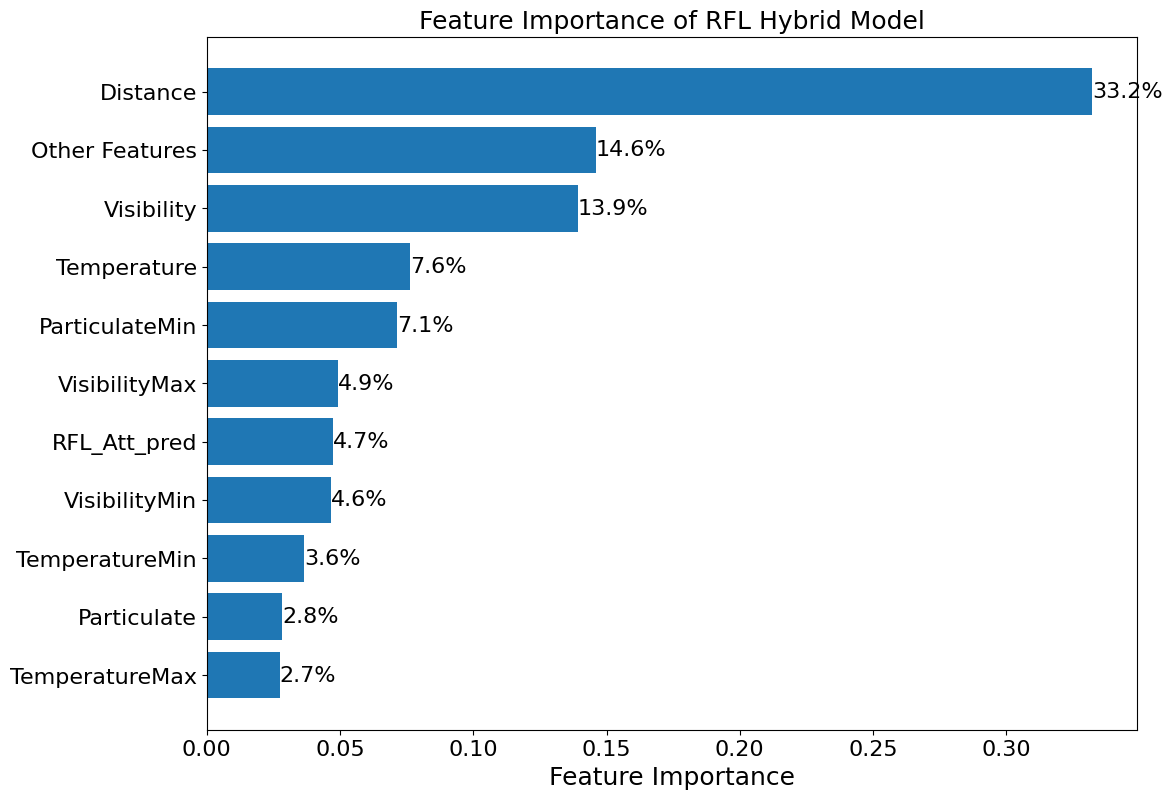

In [12]:

feature_importance = fso2_rf_model.feature_importances_
print("Feature Importance:", feature_importance)

sorted_features_fso,sorted_importance_fso = \
    ModelFunctions.sort_features_1(fso2_rf_model,Xtrain_fso,channel = "FSO",figure = False)

sorted_features_fso = list(reversed(sorted_features_fso))
sorted_importance_fso =  list(reversed(sorted_importance_fso))

plt.figure(figsize=(12, 9))
bars = plt.barh(sorted_features_fso, sorted_importance_fso)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')

plt.xlabel('Feature Importance',fontsize=18)
#plt.ylabel('Features',fontsize=18)
plt.title('Feature Importance of RFL Hybrid Model',fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.show()



In [13]:
train_rfl_fso_summary = train_rfl_fso
train_rfl_fso_summary["rfl_1st"] = ytrain_rfl_pred
train_rfl_fso_summary["fso_2nd"] = ytrain_fso_pred

test_rfl_fso_summary = test_rfl_fso
test_rfl_fso_summary["rfl_1st"] = ytest_rfl_pred
test_rfl_fso_summary["fso_2nd"] = ytest_fso_pred


print(train_rfl_fso_summary.head(5))
print(test_rfl_fso_summary.head(5))

         rfl_ori   fso_ori    rfl_1st   fso_2nd
12119   4.383918  8.976157   4.375739  8.743481
12395   6.731623  7.067532   6.904466  6.908075
45768  11.700958  2.876168  11.722645  2.862447
43767  10.923080  2.736651  10.927537  2.793564
79697  11.600878  7.997360  11.573356  8.104902
         rfl_ori    fso_ori    rfl_1st    fso_2nd
23811  11.016483   3.555870  11.089837   3.308066
33249  12.537385   4.029149  12.559983   3.448022
31945  15.971561   5.697896  15.899623   5.789154
3431    7.419677  11.731163   7.318960  11.615362
66292  11.811043   4.094981  11.950892   4.474255


# first fso， second RFL

In [14]:
Xtrain_fso = Xtrain_ori.drop(columns=["RFL_Att","FSO_Att"])
Xval_fso = Xval_ori.drop(columns=["RFL_Att","FSO_Att"])

Ytrain_fso = train_rfl_fso["fso_ori"]
Yval_fso = test_rfl_fso["fso_ori"]



In [15]:
fso_rf_model.fit(Xtrain_fso, Ytrain_fso)
with open('hybrid_fso_first_model.pkl', 'wb') as file:
    pickle.dump(fso_rf_model, file)

In [16]:
with open('hybrid_fso_first_model.pkl', 'rb') as file:
    fso_rf_model = pickle.load(file)

ytrain_fso_pred = fso_rf_model.predict(Xtrain_fso)
# Calculate predictions on validation set
ytest_fso_pred = fso_rf_model.predict(Xval_fso)


In [17]:
train_fso_mse = mean_squared_error(Ytrain_fso, ytrain_fso_pred)
train_fso_rmse = np.sqrt(train_fso_mse)
train_fso_r2 = r2_score(Ytrain_fso, ytrain_fso_pred)

# Calculate MSE and R2 on validation set
test_fso_mse = mean_squared_error(Yval_fso, ytest_fso_pred)
test_fso_rmse = np.sqrt(test_fso_mse)
test_fso_r2 = r2_score(Yval_fso, ytest_fso_pred)

print("train_fso_rmse:", train_fso_rmse)
print("train_fso_r2:", train_fso_r2)
print("test_fso_rmse:", test_fso_rmse)
print("test_fso_r2:", test_fso_r2)


train_fso_rmse: 0.3129979951541164
train_fso_r2: 0.9936200004230779
test_fso_rmse: 0.8086405889670079
test_fso_r2: 0.9563082285408542


In [18]:
Xtrain_rfl = Xtrain_fso
Xtrain_rfl['FSO_Att_pred'] = ytrain_fso_pred
Ytrain_rfl = train_rfl_fso["rfl_ori"]
#Xtrain_fso.head(5)
Xval_rfl = Xval_fso
Xval_fso['FSO_Att_pred'] = ytest_fso_pred
#Xval_fso.head(5)
Yval_fso = test_rfl_fso["rfl_ori"]

In [19]:
rfl2_rf_model.fit(Xtrain_rfl, Ytrain_rfl)
with open('hybrid_rfl_second_model.pkl', 'wb') as file:
    pickle.dump(rfl2_rf_model, file)

In [20]:
with open('hybrid_rfl_second_model.pkl', 'rb') as file:
    rfl2_rf_model = pickle.load(file)
ytrain_rfl_pred = rfl2_rf_model.predict(Xtrain_rfl)
# Calculate predictions on validation set
ytest_rfl_pred = rfl2_rf_model.predict(Xval_rfl)

In [21]:
train_rfl_mse = mean_squared_error(Ytrain_rfl, ytrain_rfl_pred)
train_rfl_rmse = np.sqrt(train_rfl_mse)
train_rfl_r2 = r2_score(Ytrain_rfl, ytrain_rfl_pred)

# Calculate MSE and R2 on validation set
test_rfl_mse = mean_squared_error(Yval_rfl, ytest_rfl_pred)
test_rfl_rmse = np.sqrt(test_rfl_mse)
test_rfl_r2 = r2_score(Yval_rfl, ytest_rfl_pred)

print("train_rfl_rmse:", train_rfl_rmse)
print("train_rfl_r2:", train_rfl_r2)
print("test_rfl_rmse:", test_rfl_rmse)
print("test_rfl_r2:", test_rfl_r2)

train_rfl_rmse: 0.19545853193306337
train_rfl_r2: 0.9967800533812832
test_rfl_rmse: 0.5127739369995364
test_rfl_r2: 0.9775921648169258


In [22]:
feature_importance = rfl2_rf_model.feature_importances_
print("Feature Importance:", feature_importance)

sorted_features_rfl,sorted_importance_rfl = \
    ModelFunctions.sort_features_1(rfl2_rf_model,Xtrain_rfl,channel = "RFL",figure = False)

Feature Importance: [0.19717217 0.00625481 0.00406631 0.13522233 0.01156384 0.00230933
 0.01545568 0.00643913 0.22782942 0.08038043 0.06617699 0.01092799
 0.02761458 0.08711035 0.00631718 0.01005175 0.03050657 0.00545529
 0.00671617 0.00416535 0.00518756 0.00100984 0.00093115 0.00255358
 0.00092907 0.0476531 ]


Feature Importance: [0.19717217 0.00625481 0.00406631 0.13522233 0.01156384 0.00230933
 0.01545568 0.00643913 0.22782942 0.08038043 0.06617699 0.01092799
 0.02761458 0.08711035 0.00631718 0.01005175 0.03050657 0.00545529
 0.00671617 0.00416535 0.00518756 0.00100984 0.00093115 0.00255358
 0.00092907 0.0476531 ]


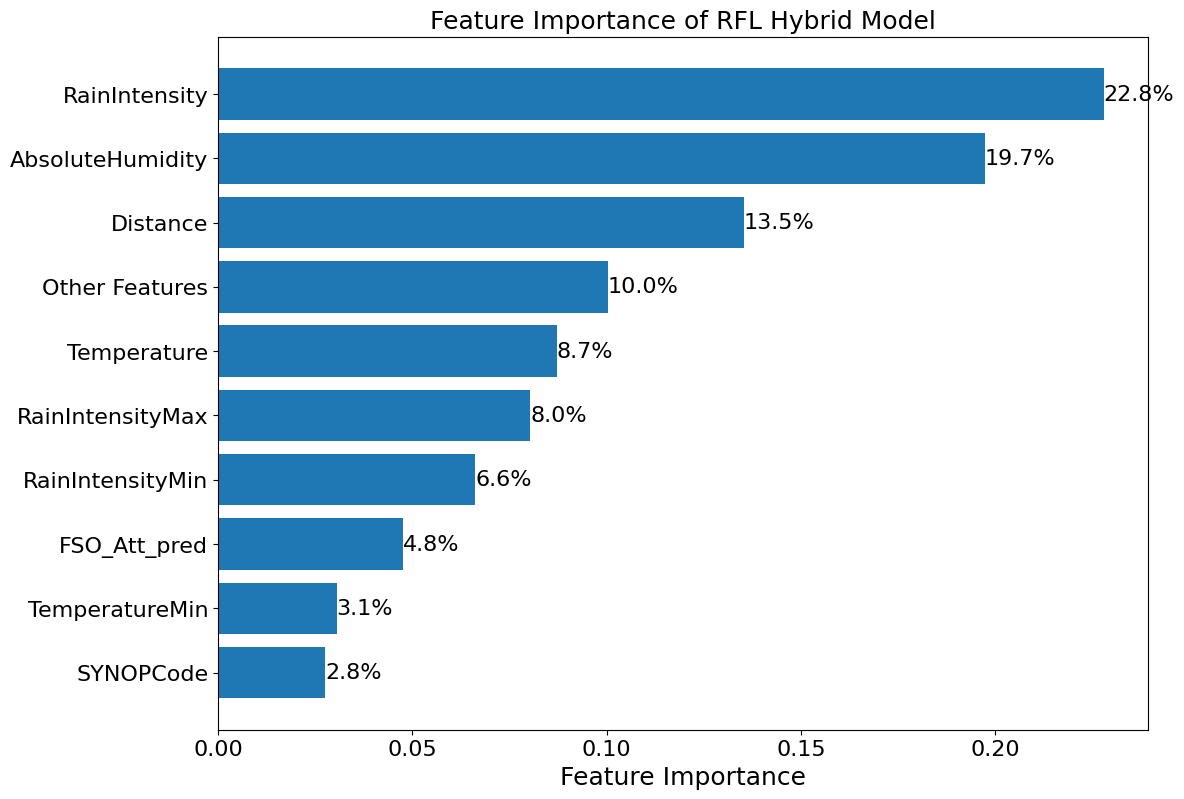

In [23]:
feature_importance_rfl = rfl2_rf_model.feature_importances_
print("Feature Importance:", feature_importance)

sorted_features_rfl,sorted_importance_rfl = \
    ModelFunctions.sort_features_1(rfl2_rf_model,Xtrain_rfl,channel = "RFL",figure = False)
sorted_features_rfl = list(reversed(sorted_features_rfl))
sorted_importance_rfl =  list(reversed(sorted_importance_rfl))

plt.figure(figsize=(12, 9))
bars = plt.barh(sorted_features_rfl, sorted_importance_rfl)

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')

plt.xlabel('Feature Importance',fontsize=18)
#plt.ylabel('Features',fontsize=18)
plt.title('Feature Importance of RFL Hybrid Model',fontsize=18)
plt.tick_params(axis='both', labelsize=16)
plt.show()

In [24]:

train_rfl_fso_summary["fso_1st"] = ytrain_fso_pred
train_rfl_fso_summary["rfl_2nd"] = ytrain_rfl_pred

test_rfl_fso_summary["rfl_2nd"] = ytest_rfl_pred
test_rfl_fso_summary["fso_1st"] = ytest_fso_pred


print(train_rfl_fso_summary.head(5))
print(test_rfl_fso_summary.head(5))

         rfl_ori   fso_ori    rfl_1st   fso_2nd   fso_1st    rfl_2nd
12119   4.383918  8.976157   4.375739  8.743481  8.703030   4.384215
12395   6.731623  7.067532   6.904466  6.908075  6.773386   6.774635
45768  11.700958  2.876168  11.722645  2.862447  2.850680  11.719621
43767  10.923080  2.736651  10.927537  2.793564  2.796701  10.918689
79697  11.600878  7.997360  11.573356  8.104902  8.362117  11.595582
         rfl_ori    fso_ori    rfl_1st    fso_2nd    rfl_2nd    fso_1st
23811  11.016483   3.555870  11.089837   3.308066  11.072898   3.392525
33249  12.537385   4.029149  12.559983   3.448022  12.403590   3.385852
31945  15.971561   5.697896  15.899623   5.789154  15.881711   5.809743
3431    7.419677  11.731163   7.318960  11.615362   7.522832  11.640449
66292  11.811043   4.094981  11.950892   4.474255  11.923328   4.570595


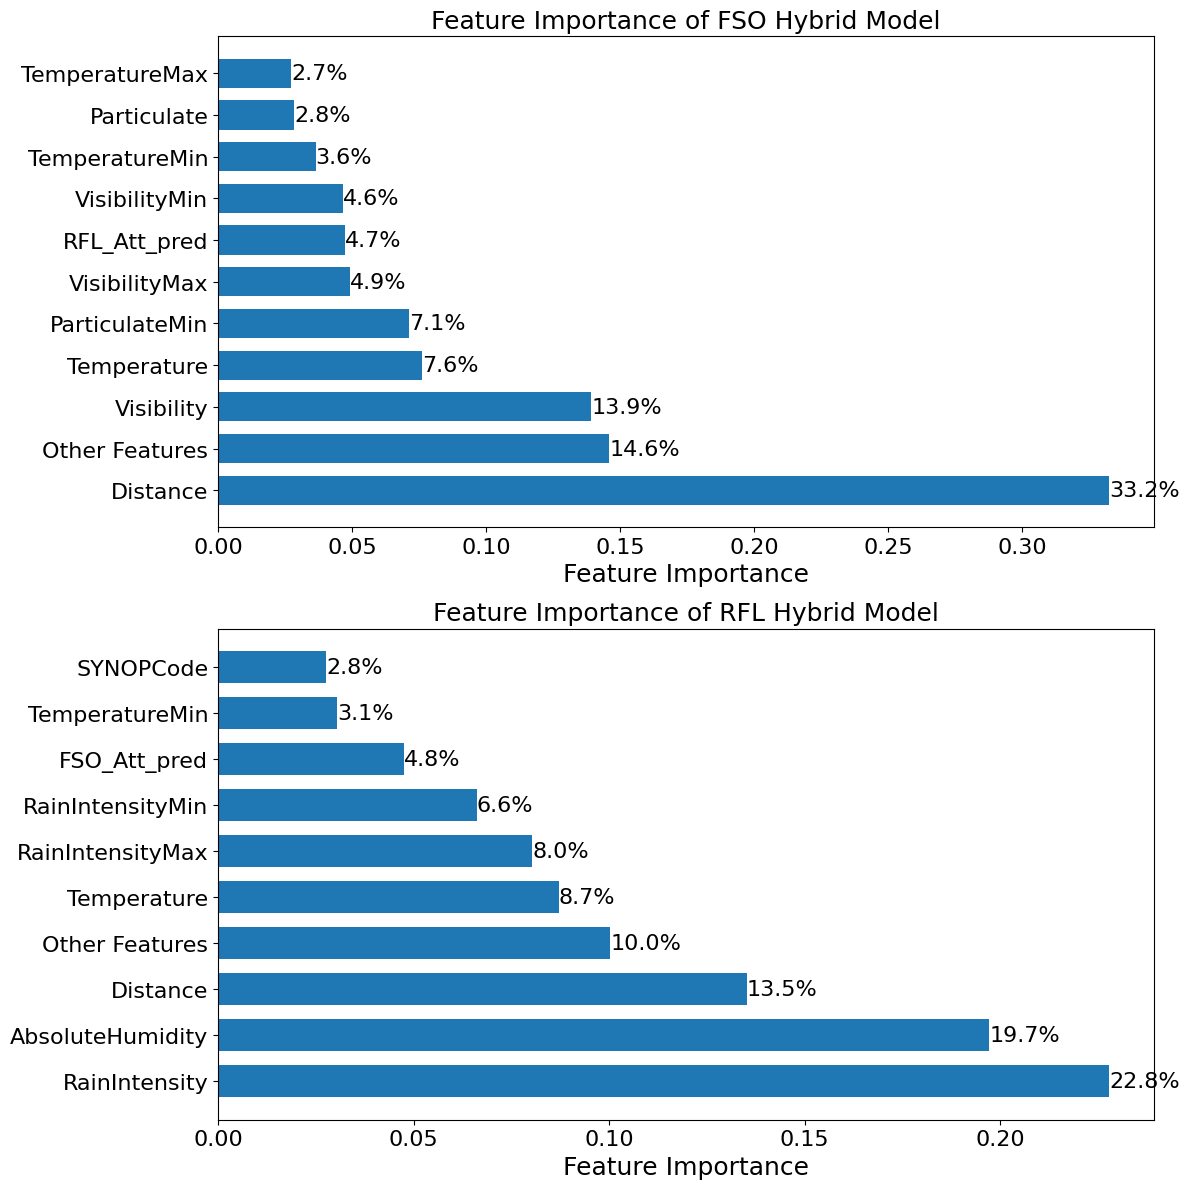

In [25]:
import matplotlib.pyplot as plt

# Assuming sorted_features_fso, sorted_importance_fso, sorted_features_rfl, and sorted_importance_rfl are defined

# Reverse the feature and importance lists
sorted_features_fso = list(reversed(sorted_features_fso))
sorted_importance_fso = list(reversed(sorted_importance_fso))
sorted_features_rfl = list(reversed(sorted_features_rfl))
sorted_importance_rfl = list(reversed(sorted_importance_rfl))

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot the first bar chart (FSO)
bars_fso = ax1.barh(sorted_features_fso, sorted_importance_fso,height=0.7)
for bar in bars_fso:
    ax1.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')
ax1.set_xlabel('Feature Importance', fontsize=18)
ax1.set_title('Feature Importance of FSO Hybrid Model', fontsize=18)
ax1.tick_params(axis='both', labelsize=16)

# Plot the second bar chart (RFL)
bars_rfl = ax2.barh(sorted_features_rfl, sorted_importance_rfl,height=0.7)
for bar in bars_rfl:
    ax2.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()*100:.1f}%', 
             va='center', ha='left', fontsize=16, color='black')
ax2.set_xlabel('Feature Importance', fontsize=18)
ax2.set_title('Feature Importance of RFL Hybrid Model', fontsize=18)
ax2.tick_params(axis='both', labelsize=16)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [26]:
from scipy.stats import pearsonr
correlation_coefficient, p_value = pearsonr(train_rfl_fso_summary["rfl_ori"], train_rfl_fso_summary["fso_ori"])
correlation_coefficient1, p_value1 = pearsonr(train_rfl_fso_summary["rfl_1st"], train_rfl_fso_summary["fso_2nd"])
correlation_coefficient2, p_value2 = pearsonr(train_rfl_fso_summary["rfl_2nd"], train_rfl_fso_summary["fso_1st"])
print("Pearson Correlation Coefficient:", correlation_coefficient,correlation_coefficient1,correlation_coefficient2)
print("P-value:", p_value,p_value1,p_value2)

Pearson Correlation Coefficient: 0.09099649067887039 0.08952682146903174 0.08973549905781263
P-value: 1.1250637102140708e-117 5.9358122004554884e-114 1.7729248560324847e-114


In [27]:
df = data
# 按照 SYNOPCode 列的值分组，并获取每个分组中行的索引
indices = df.groupby('SYNOPCode').apply(lambda x: x.index.tolist()).to_dict()

# 打印结果
for synop_code, index_list in indices.items():
    print(f"SYNOPCode = {synop_code} 的索引：{index_list}")

SYNOPCode = 0 的索引：[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 53, 57, 63, 69, 70, 71, 72, 73, 74, 75, 88, 89, 90, 91, 99, 100, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 179, 183, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 212, 213, 214, 215, 216, 217, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 244, 245, 246, 247, 248, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 273, 274, 275, 276, 277, 278, 279, 280, 281, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 3

C:\Users\nining\AppData\Local\Temp\ipykernel_21464\1028588459.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  indices = df.groupby('SYNOPCode').apply(lambda x: x.index.tolist()).to_dict()


In [28]:
synopcode = [synop_code for i in train_rfl_fso_summary.index for synop_code, index_list in indices.items() if i in index_list]
train_rfl_fso_summary["SYNOPcode"] = synopcode

In [29]:

synopcode1 = [synop_code for i in test_rfl_fso_summary.index for synop_code, index_list in indices.items() if i in index_list]
test_rfl_fso_summary["SYNOPcode"] = synopcode1


In [30]:
correlation_coefficient, p_value = pearsonr(train_rfl_fso_summary["rfl_ori"], train_rfl_fso_summary["fso_ori"])
correlation_coefficient, p_value = pearsonr(train_rfl_fso_summary["rfl_1st"], train_rfl_fso_summary["fso_2nd"])
correlation_coefficient, p_value = pearsonr(train_rfl_fso_summary["rfl_2nd"], train_rfl_fso_summary["fso_1st"])
print(f"SYNOPCode=all: 0={correlation_coefficient},1={correlation_coefficient1},2={correlation_coefficient2}")
grouped = train_rfl_fso_summary.groupby('SYNOPcode')
for name, group in grouped:
    correlation_coefficient, p_value = pearsonr(group["rfl_ori"], group["fso_ori"])
    correlation_coefficient1, p_value1 = pearsonr(group["rfl_1st"], group["fso_2nd"])
    correlation_coefficient2, p_value2 = pearsonr(group["rfl_2nd"], group["fso_1st"])
    print(f"SYNOPCode={name}: 0={correlation_coefficient},1={correlation_coefficient1},2={correlation_coefficient2}")

SYNOPCode=all: 0=0.08973549905781263,1=0.08952682146903174,2=0.08973549905781263
SYNOPCode=0: 0=-0.2616462549510331,1=-0.27240457717278604,2=-0.27201666094522114
SYNOPCode=3: 0=-0.42445685179532405,1=-0.4437995144491403,2=-0.44401539320842665
SYNOPCode=4: 0=0.6111115879195446,1=0.6138778002059051,2=0.6140592329990286
SYNOPCode=5: 0=-0.16067045828604148,1=-0.17122638609330323,2=-0.17140793966949813
SYNOPCode=6: 0=0.3457890804250071,1=0.348868557886375,2=0.3496159620793848
SYNOPCode=7: 0=0.7926726189482478,1=0.7978042078679088,2=0.7977462906078193
SYNOPCode=8: 0=-0.17030812226767483,1=-0.1982197457534306,2=-0.19291852941593474


In [31]:
correlation_coefficient, p_value = pearsonr(test_rfl_fso_summary["rfl_ori"], test_rfl_fso_summary["fso_ori"])
correlation_coefficient, p_value = pearsonr(test_rfl_fso_summary["rfl_1st"], test_rfl_fso_summary["fso_2nd"])
correlation_coefficient, p_value = pearsonr(test_rfl_fso_summary["rfl_2nd"], test_rfl_fso_summary["fso_1st"])
print(f"SYNOPCode=all: 0={correlation_coefficient},1={correlation_coefficient1},2={correlation_coefficient2}")
grouped = test_rfl_fso_summary.groupby('SYNOPcode')
for name, group in grouped:
    correlation_coefficient, p_value = pearsonr(group["rfl_ori"], group["fso_ori"])
    correlation_coefficient1, p_value1 = pearsonr(group["rfl_1st"], group["fso_2nd"])
    correlation_coefficient2, p_value2 = pearsonr(group["rfl_2nd"], group["fso_1st"])
    print(f"SYNOPCode={name}: 0={correlation_coefficient},1={correlation_coefficient1},2={correlation_coefficient2}")

SYNOPCode=all: 0=0.08889474357414288,1=-0.1982197457534306,2=-0.19291852941593474
SYNOPCode=0: 0=-0.2822729709231866,1=-0.30109238359207136,2=-0.29918346326533396
SYNOPCode=3: 0=-0.40588346734933767,1=-0.4299837460482996,2=-0.41838457518504724
SYNOPCode=4: 0=0.49200241747768464,1=0.5258649438590953,2=0.526407674352521
SYNOPCode=5: 0=-0.14395378840529183,1=-0.15851235864966118,2=-0.15748496811715
SYNOPCode=6: 0=0.35441024152583633,1=0.3670077699840428,2=0.3667213254141464
SYNOPCode=7: 0=0.8249750416249562,1=0.8295777076693132,2=0.8246118275023843
SYNOPCode=8: 0=-0.16620523047649544,1=-0.24569585657547333,2=-0.24067602087968035


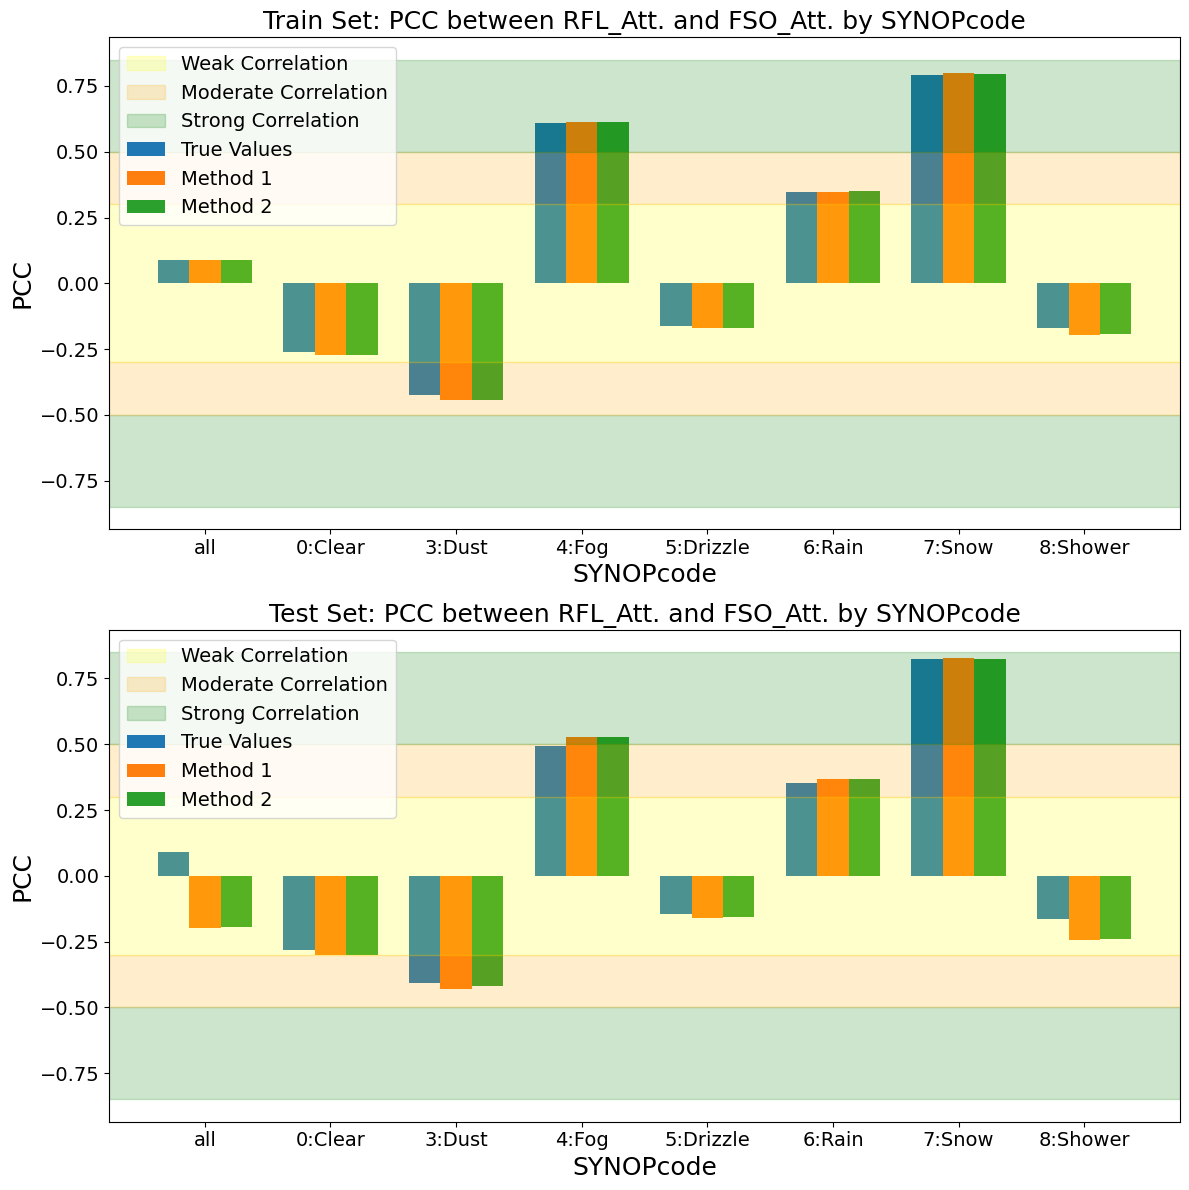

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first set
synop_codes1 = ['all', '0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
values1 = {
    'all': [0.08971089448187762, 0.08956234232304244, 0.08971089448187762],
    '0:Clear': [-0.2616462549510331, -0.27229948563270256, -0.2719788159728068],
    '3:Dust': [-0.42445685179532405, -0.44434130849188375, -0.4431461794731302],
    '4:Fog': [0.6111115879195446, 0.6129632088333634, 0.6142614224737175],
    '5:Drizzle': [-0.16067045828604148, -0.17147030820799927, -0.17117333448171357],
    '6:Rain': [0.3457890804250071, 0.34889708622823135, 0.34958272527966117],
    '7:Snow': [0.7926726189482478, 0.7983781405855399, 0.7973090324136591],
    '8:Shower': [-0.17030812226767483, -0.19746671780287964, -0.1938588939555077]
}
# Data for the second set
synop_codes2 = ['all', '0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
values2 = {
    'all': [0.08881934440659248, -0.1974667178028796, -0.1938588939555077],
    '0:Clear': [-0.2822729709231866, -0.3011272555020169, -0.2992992689540678],
    '3:Dust': [-0.40588346734933767, -0.4318005518923787, -0.4182634099637823],
    '4:Fog': [0.49200241747768464, 0.5265582888674546, 0.5264251931934119],
    '5:Drizzle': [-0.14395378840529183, -0.15895440806208472, -0.15726087789277152],
    '6:Rain': [0.35441024152583633, 0.36714810900163386, 0.3664325629560323],
    '7:Snow': [0.8249750416249562, 0.8290359820997388, 0.8241631475373978],
    '8:Shower': [-0.16620523047649544, -0.24554898579094836, -0.24049813980073018]
}

# Extracting the groups of values for first set
values1_0 = [values1[synop][0] for synop in synop_codes1]
values1_1 = [values1[synop][1] for synop in synop_codes1]
values1_2 = [values1[synop][2] for synop in synop_codes1]

# Extracting the groups of values for second set
values2_0 = [values2[synop][0] for synop in synop_codes2]
values2_1 = [values2[synop][1] for synop in synop_codes2]
values2_2 = [values2[synop][2] for synop in synop_codes2]

# Preparing data for plotting
x = np.arange(len(synop_codes1))
bar_width = 0.25

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plotting first set
ax1.bar(x - bar_width, values1_0, bar_width, label='True Values')
ax1.bar(x, values1_1, bar_width, label='Method 1')
ax1.bar(x + bar_width, values1_2, bar_width, label='Method 2')

# Adding labels and title to the first subplot
ax1.set_xlabel('SYNOPcode',fontsize=18)
ax1.set_ylabel('PCC',fontsize=18)
ax1.set_title('Train Set: PCC between RFL_Att. and FSO_Att. by SYNOPcode',fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(synop_codes1)
ax1.tick_params(labelsize=14)

# Adding correlation ranges annotations
ax1.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax1.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
ax1.axhspan(-0.5, -0.85, color='green', alpha=0.2)
ax1.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax1.legend(fontsize  = 14)
# Plotting second set
ax2.bar(x - bar_width, values2_0, bar_width, label='True Values')
ax2.bar(x, values2_1, bar_width, label='Method 1')
ax2.bar(x + bar_width, values2_2, bar_width, label='Method 2')

# Adding labels and title to the second subplot
ax2.set_xlabel('SYNOPcode',fontsize=18)
ax2.set_ylabel('PCC',fontsize=18)
ax2.set_title('Test Set: PCC between RFL_Att. and FSO_Att. by SYNOPcode',fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(synop_codes2)
ax2.tick_params(labelsize=14)


# Adding correlation ranges annotations
ax2.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax2.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax2.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
ax2.axhspan(-0.5, -0.85, color='green', alpha=0.2)
ax2.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax2.legend(fontsize  = 14)
# Show the plot
plt.tight_layout()
plt.show()


In [33]:
print(values2_0)
print(values2_2) 

[0.08881934440659248, -0.2822729709231866, -0.40588346734933767, 0.49200241747768464, -0.14395378840529183, 0.35441024152583633, 0.8249750416249562, -0.16620523047649544]
[-0.1938588939555077, -0.2992992689540678, -0.4182634099637823, 0.5264251931934119, -0.15726087789277152, 0.3664325629560323, 0.8241631475373978, -0.24049813980073018]


In [34]:
test_rfl_fso_summary.shape

(27414, 7)

In [35]:
grouped = test_rfl_fso_summary.groupby('SYNOPcode')
for name, group in grouped:
    print(name)
    print(group["rfl_ori"])
    # rfl_ori = group["rfl_ori"], fso_ori = group["fso_ori"]
    # rfl_1st = group["rfl_1st"], fso_2nd = group["fso_2nd"]
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed

# Counter for loop
count = 1
grouped = test_rfl_fso_summary.groupby('SYNOPcode')
for name, group in grouped:
    rfl_ori = group["rfl_ori"]
    print(rfl_ori.shape)

0
23811    11.016483
33249    12.537385
66292    11.811043
87499    10.653322
33636    12.691957
           ...    
21108     6.065435
52816    12.281525
23509    10.928615
26860    11.267159
69204    11.755269
Name: rfl_ori, Length: 17068, dtype: float64
3
32809    13.103350
56665    13.676636
38083    11.336008
73743    13.579268
12533     6.811109
78380    12.316199
21243     6.430398
12532     7.213368
26380    11.449159
48152    12.846621
73754    12.884281
11856     5.518549
73742    13.104918
20499     7.217660
48154    12.910598
73747    13.612396
56679    13.500727
21231     6.029684
56673    13.754295
20503     5.340897
21240     5.996489
78376    12.006861
12524     6.110125
21254     6.453354
21161     6.945630
32816    12.768197
11854     5.085887
22731    11.287837
11855     5.384063
41742    11.640955
21165     7.295738
9774      7.903818
12520     5.595038
21163     7.147698
41740    11.437619
26381    11.422447
5485      7.741871
11852     5.469518
5414      8.001488
3

<Figure size 2000x1800 with 0 Axes>

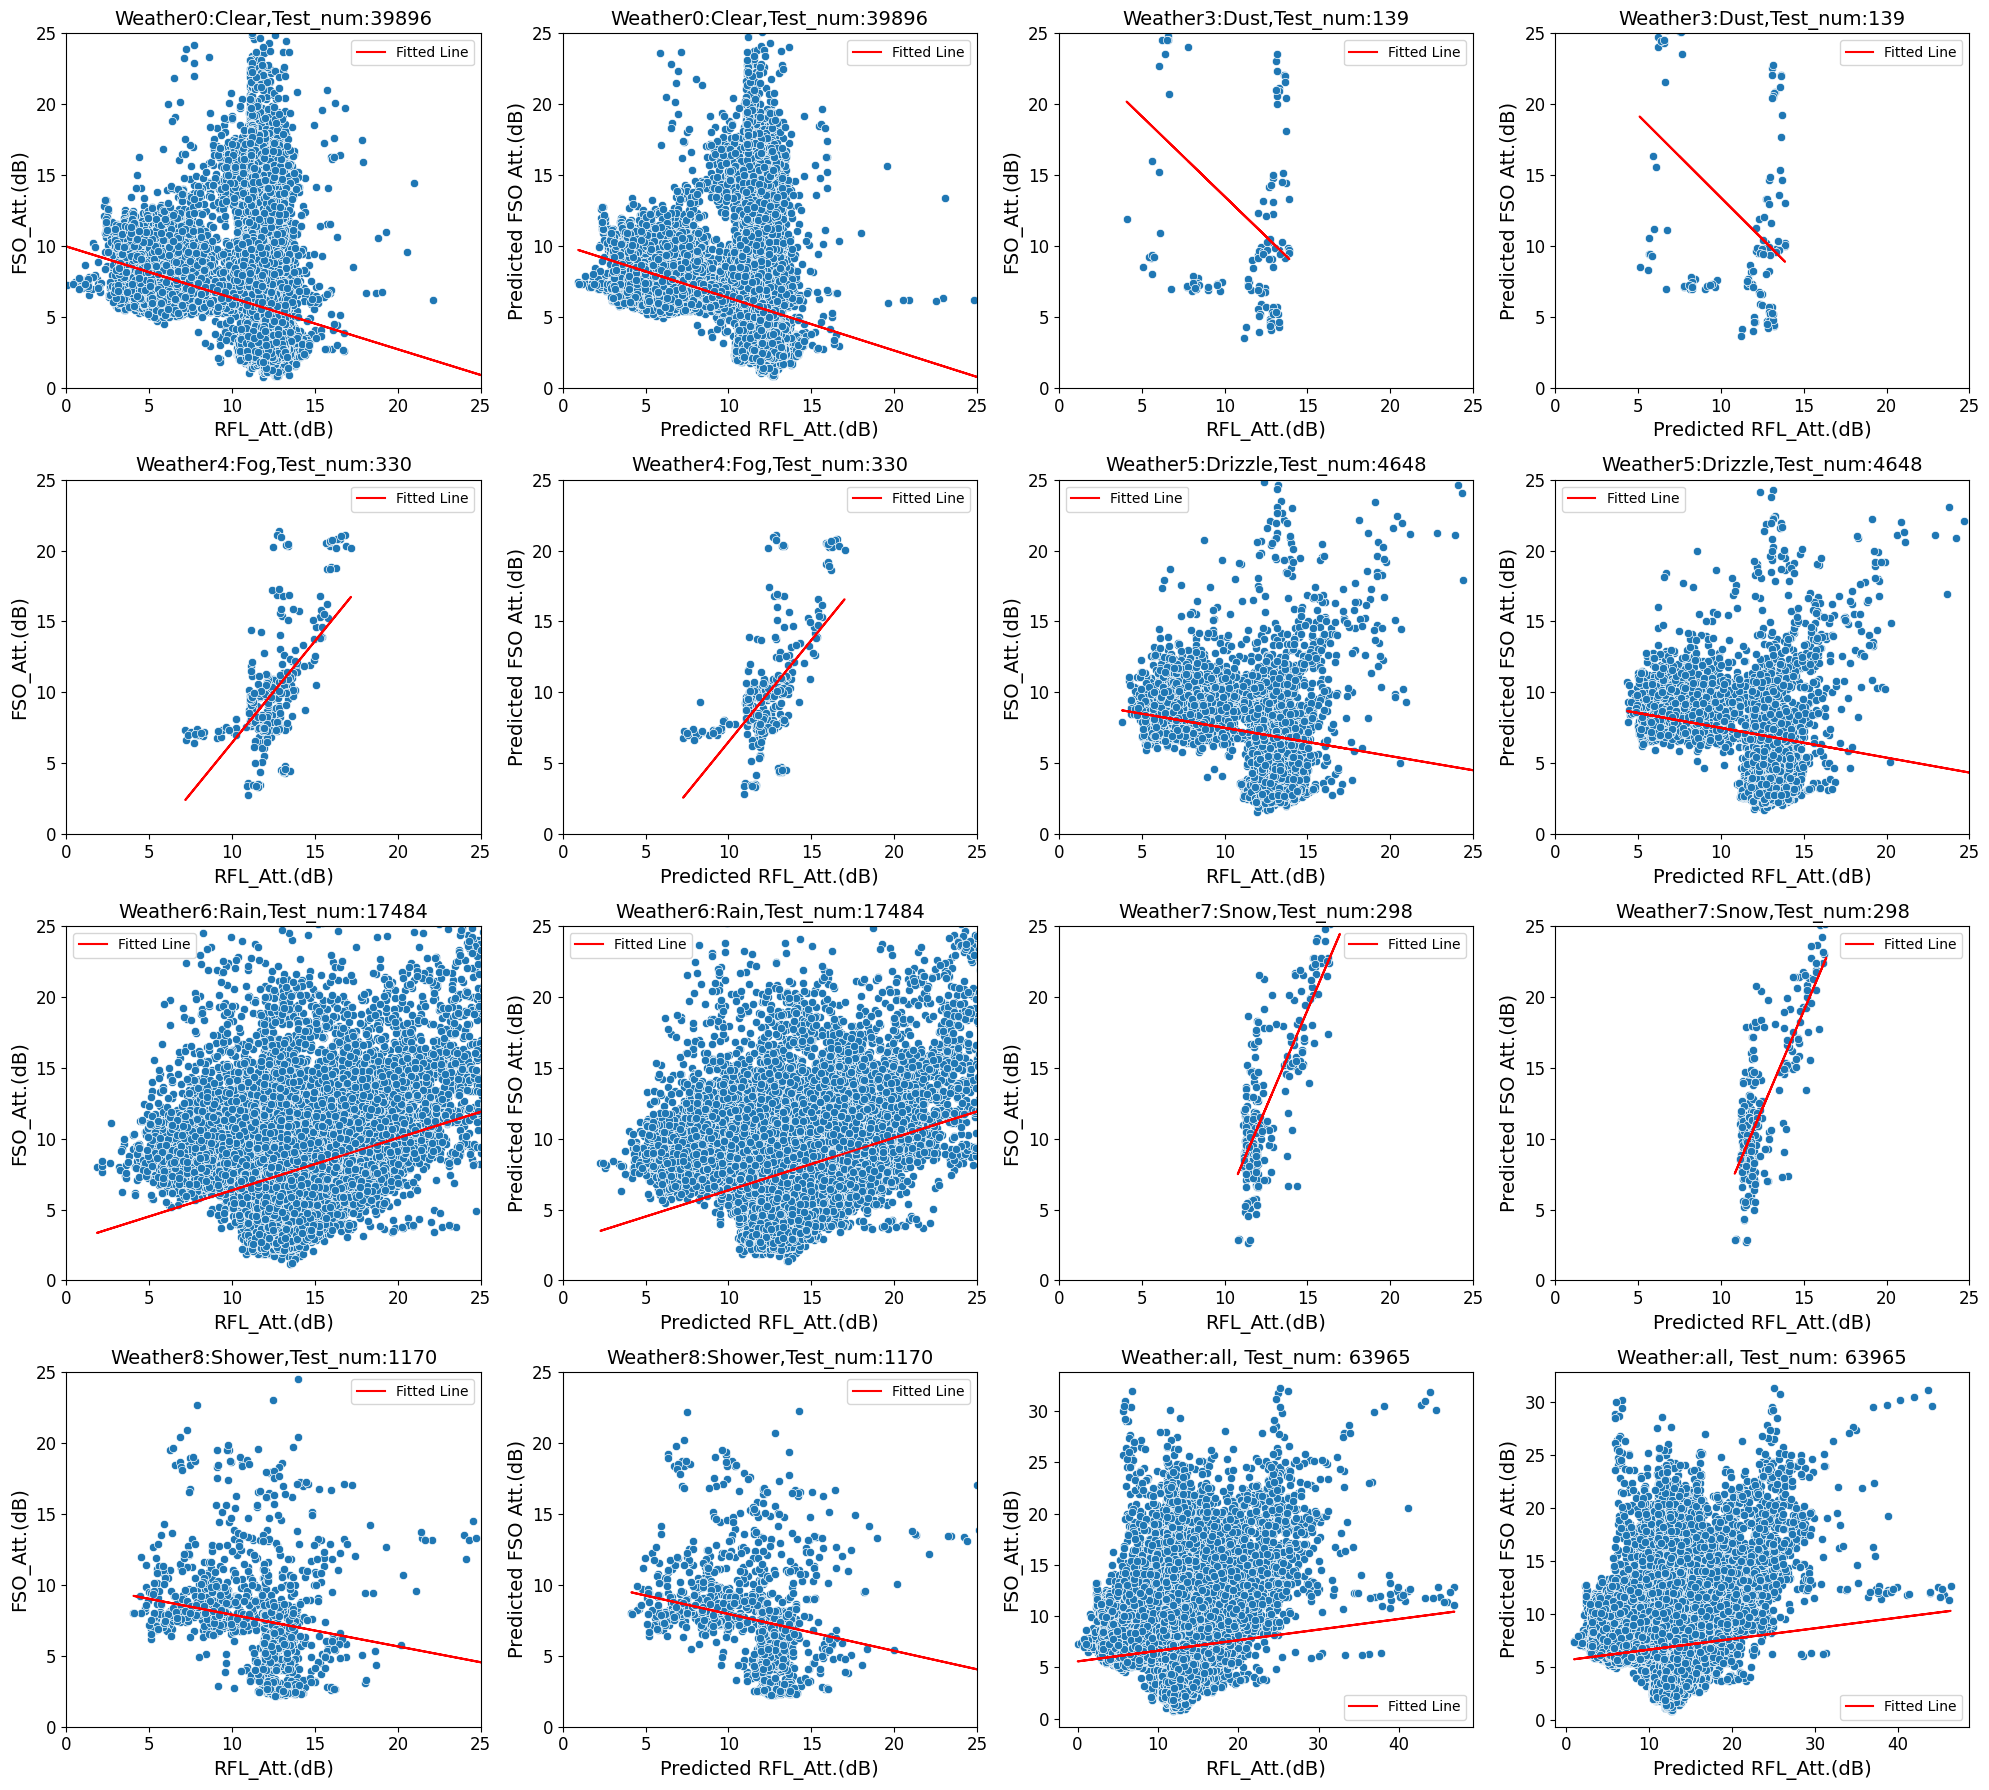

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
synop_codes = [0,3,4,5,6,7,8]
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
# Create a figure
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed

# Counter for loop
count = 1
data = train_rfl_fso_summary
grouped = data.groupby('SYNOPcode')
for name, group in grouped:

    rfl_ori = group["rfl_ori"]
    fso_ori = group["fso_ori"]
    num1 = rfl_ori.shape[0]
    rfl_1st = group["rfl_1st"]
    fso_2nd = group["fso_2nd"]


    count1 =int((count - 1)/2)
   
    # Create subplots in the loop
    plt.subplot(4, 4, count)
    sns.scatterplot(x=rfl_ori, y=fso_ori)
    #plt.plot([rfl_true.min(), rfl_true.max()], [rfl_true.min(), rfl_true.max()], 'k--', lw=2,label='Baseline') # Plot y=x line
    slope, intercept = np.polyfit(rfl_ori, fso_ori, 1) # Linear regression line
    plt.plot(rfl_ori, slope*rfl_ori + intercept, color='r', label='Fitted Line') # Plot linear regression line
    plt.title(f'Weather{synop_codes[count1]},Test_num:{num1}',fontsize=14)
    plt.xlabel('RFL_Att.(dB)',fontsize=14)
    plt.ylabel('FSO_Att.(dB)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 25)
    plt.ylim(0, 25)
    plt.legend() # Show legend
    # Increment counter
    count += 1
  
    plt.subplot(4, 4, count)
    sns.scatterplot(x=rfl_1st, y=fso_2nd)
    #plt.plot([fso_true.min(), fso_true.max()], [fso_true.min(), fso_true.max()], 'k--', lw=2, label='Baseline') # Plot y=x line
    slope, intercept = np.polyfit(rfl_1st, fso_2nd, 1) # Linear regression line
    plt.plot(rfl_1st, slope*rfl_1st + intercept, color='r', label='Fitted Line') # Plot linear regression line
    plt.title(f'Weather{synop_codes[count1]},Test_num:{num1}',fontsize=14)
    plt.xlabel('Predicted RFL_Att.(dB)',fontsize=14)
    plt.ylabel('Predicted FSO Att.(dB)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 25)
    plt.ylim(0, 25)
    plt.legend() # Show legend

    # Increment counter
    count += 1
plt.subplot(4, 4, count)
sns.scatterplot(x=data['rfl_ori'], y=data['fso_ori'])
#plt.plot([rfl_true.min(), rfl_true.max()], [rfl_true.min(), rfl_true.max()], 'k--', lw=2,label='Baseline') # Plot y=x line
slope, intercept = np.polyfit(data['rfl_ori'], data['fso_ori'], 1) # Linear regression line
plt.plot(data['rfl_ori'], slope*data['rfl_ori'] + intercept, color='r', label='Fitted Line') # Plot linear regression line
#plt.title(f'Weather:all,Test_num:{(test_rfl_fso_summary['rfl_ori']).shape[0]}',fontsize=14)
plt.title(f"Weather:all, Test_num: {(data['rfl_ori']).shape[0]}", fontsize=14)

plt.xlabel('RFL_Att.(dB)',fontsize=14)
plt.ylabel('FSO_Att.(dB)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend() # Show legend
# Increment counter
count += 1

plt.subplot(4, 4, count)
sns.scatterplot(x=data['rfl_1st'], y=data['fso_2nd'])
#plt.plot([fso_true.min(), fso_true.max()], [fso_true.min(), fso_true.max()], 'k--', lw=2, label='Baseline') # Plot y=x line
slope, intercept = np.polyfit(data['rfl_1st'], data['fso_2nd'], 1) # Linear regression line
plt.plot(data['rfl_1st'], slope*data['rfl_1st'] + intercept, color='r', label='Fitted Line') # Plot linear regression line
plt.title(f"Weather:all, Test_num: {(data['rfl_ori']).shape[0]}", fontsize=14)

plt.xlabel('Predicted RFL_Att.(dB)',fontsize=14)
plt.ylabel('Predicted FSO Att.(dB)',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend() # Show legend
# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [37]:
grouped = test_rfl_fso_summary.groupby('SYNOPcode')
for name, group in grouped:
    group["rfl_ori"], group["fso_ori"]
    correlation_coefficient1, p_value1 = pearsonr(group["rfl_1st"], group["fso_2nd"])
    correlation_coefficient2, p_value2 = pearsonr(group["rfl_2nd"], group["fso_1st"])
    print(f"SYNOPCode={name}: 0={correlation_coefficient},1={correlation_coefficient1},2={correlation_coefficient2}")

SYNOPCode=0: 0=-0.16620523047649544,1=-0.30109238359207136,2=-0.29918346326533396
SYNOPCode=3: 0=-0.16620523047649544,1=-0.4299837460482996,2=-0.41838457518504724
SYNOPCode=4: 0=-0.16620523047649544,1=0.5258649438590953,2=0.526407674352521
SYNOPCode=5: 0=-0.16620523047649544,1=-0.15851235864966118,2=-0.15748496811715
SYNOPCode=6: 0=-0.16620523047649544,1=0.3670077699840428,2=0.3667213254141464
SYNOPCode=7: 0=-0.16620523047649544,1=0.8295777076693132,2=0.8246118275023843
SYNOPCode=8: 0=-0.16620523047649544,1=-0.24569585657547333,2=-0.24067602087968035


In [38]:
Frequency = [Frequency/10**9 for i in train_rfl_fso_summary.index for Frequency, index_list in indices.items() if i in index_list]
train_rfl_fso_summary["Frequency"] = Frequency

In [39]:
Frequency = [Frequency/10**9 for i in test_rfl_fso_summary.index for Frequency, index_list in indices.items() if i in index_list]
test_rfl_fso_summary["Frequency"] = Frequency

In [40]:
test_rfl_fso_summary.head(5)

,rfl_ori,fso_ori,rfl_1st,fso_2nd,rfl_2nd,fso_1st,SYNOPcode,Frequency
23811,11.016483,3.555870,11.089837,3.308066,11.072898,3.392525,0,0.000000e+00
33249,12.537385,4.029149,12.559983,3.448022,12.403590,3.385852,0,0.000000e+00
31945,15.971561,5.697896,15.899623,5.789154,15.881711,5.809743,6,6.000000e-09
3431,7.419677,11.731163,7.318960,11.615362,7.522832,11.640449,6,6.000000e-09
66292,11.811043,4.094981,11.950892,4.474255,11.923328,4.570595,0,0.000000e+00


In [41]:
test_rfl_fso_summary.to_csv('test_rfl_fso_summary.csv', index=False) 
train_rfl_fso_summary.to_csv('train_rfl_fso_summary.csv', index=False) 


In [42]:
test_rfl_fso_summary.columns

Index(['rfl_ori', 'fso_ori', 'rfl_1st', 'fso_2nd', 'rfl_2nd', 'fso_1st',
       'SYNOPcode', 'Frequency'],
      dtype='object')

In [43]:
correlation_matrix = test_rfl_fso_summary.groupby(['SYNOPcode', 'Frequency'])
print(correlation_matrix)
result_p_73_5 =[]
result_p_83_5 =[]
for group_name, group_data in correlation_matrix:
    # print("Group Name:", group_name)
    # print(group_data.columns)
    coe, p_value = pearsonr(group_data["rfl_ori"], group_data["fso_ori"])
    coe1, p_value1 = pearsonr(group_data["rfl_1st"], group_data["fso_2nd"])
    coe2, p_value2 = pearsonr(group_data["rfl_2nd"], group_data["fso_1st"])
    if 73.5 in  group_name:
        result_p_73_5.append([coe,coe1,coe2])
    else: 
        result_p_83_5.append([coe,coe1,coe2])



In [44]:
result_p_73_5

[]

In [45]:
result_p_83_5

[[-0.2822729709231866, -0.30109238359207136, -0.29918346326533396],
 [-0.40588346734933767, -0.4299837460482996, -0.41838457518504724],
 [0.49200241747768464, 0.5258649438590953, 0.526407674352521],
 [-0.14395378840529183, -0.15851235864966118, -0.15748496811715],
 [0.35441024152583633, 0.3670077699840428, 0.3667213254141464],
 [0.8249750416249562, 0.8295777076693132, 0.8246118275023843],
 [-0.16620523047649544, -0.24569585657547333, -0.24067602087968035]]

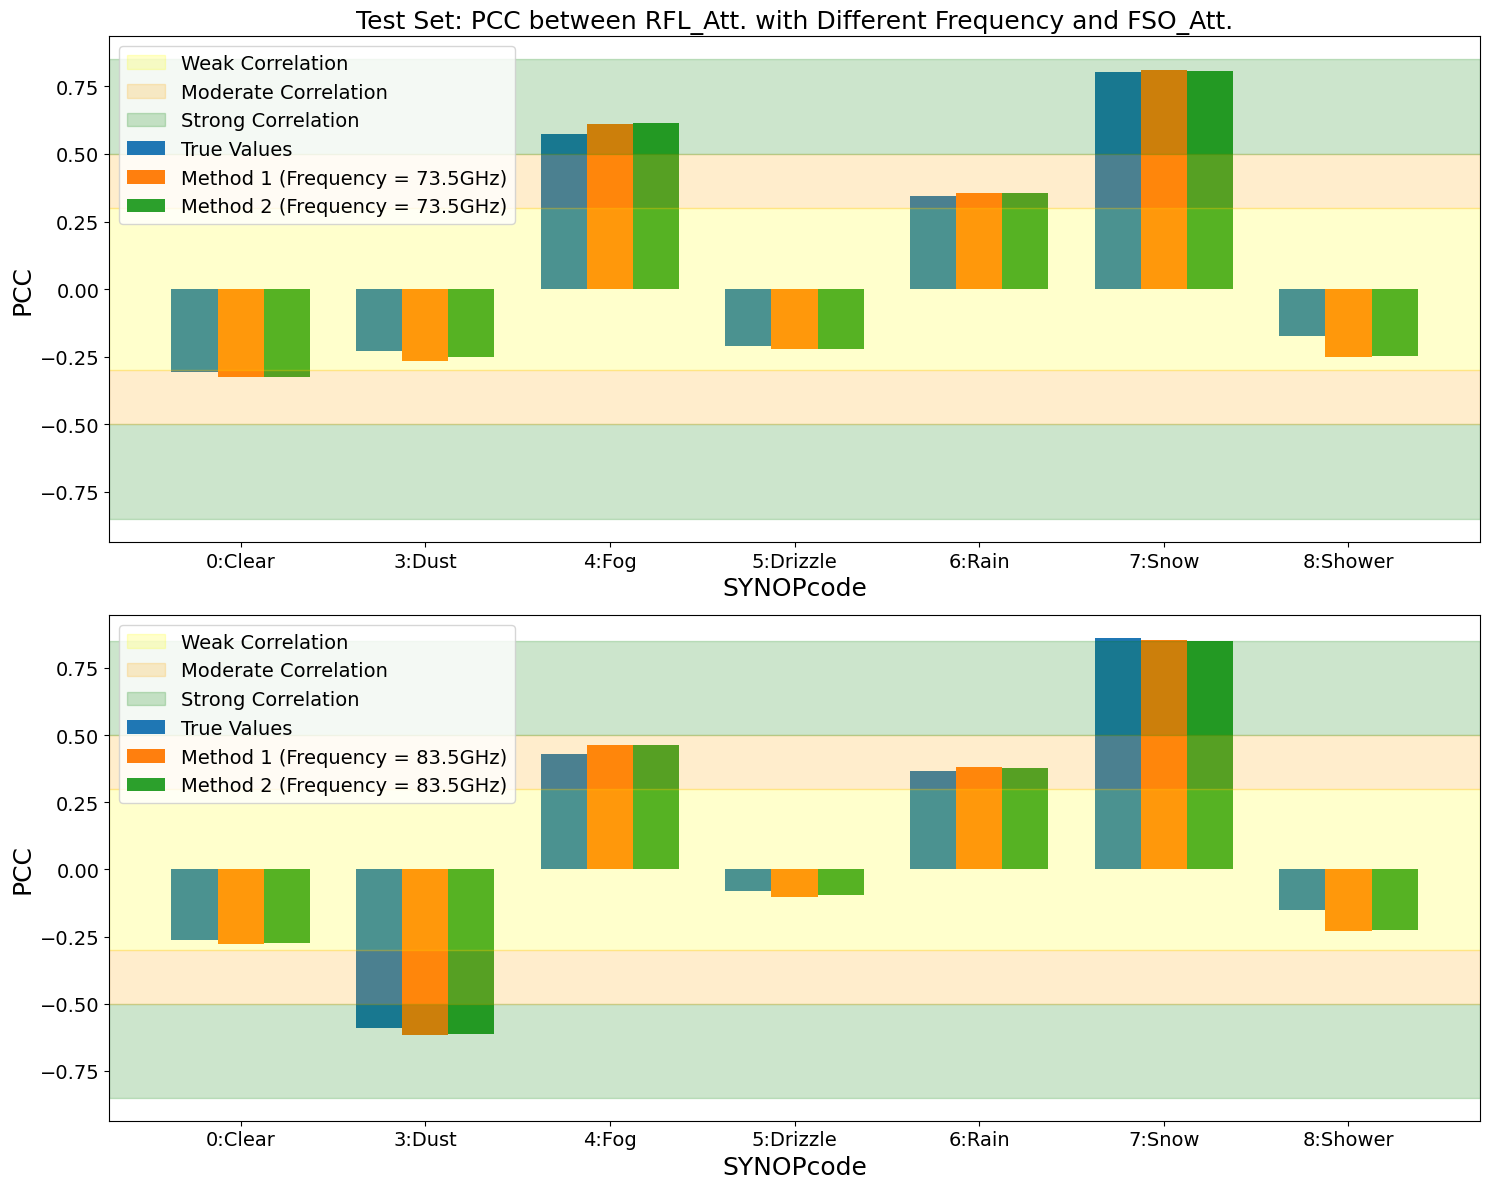

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the first set
synop_codes1 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
values1 = {
    '0:Clear': [-0.30510931799046875, -0.3246887889413957, -0.3250932731031898],
    '3:Dust':[-0.22809999935057446, -0.2669180209658545, -0.25189100212451226],
    '4:Fog': [0.5732648815791788, 0.6123645230705708, 0.6139691548872996],
    '5:Drizzle':[-0.21144873107387044, -0.21985246345568654, -0.2231190556444154],
    '6:Rain': [0.34483506201758296, 0.35589958550258854, 0.35688263849421065],
    '7:Snow': [0.8030170975529164, 0.8122200201505659, 0.8078376095085098],
    '8:Shower': [-0.17407238560603025, -0.2527579024789518, -0.2480127688740604]
}
# Data for the second set
synop_codes2 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
values2 = {
    '0:Clear':[-0.26098872065083123, -0.27889361909983057, -0.2749988095559582],
    '3:Dust':[-0.5907421746162183, -0.6175922780557952, -0.6137467729794268],
    '4:Fog': [0.4310789336216515, 0.46429923092473524, 0.46413625951774085],
    '5:Drizzle':[-0.08019968609508635, -0.10130115678753604, -0.09476547227514054],
    '6:Rain': [0.3654094045670237, 0.37958399248745434, 0.377006075833974],
    '7:Snow': [0.8607496345265021, 0.8538616203590147, 0.8499563935459906],
    '8:Shower': [-0.14998112605966946, -0.2310500296562118, -0.22539035135446955] 
}

# Extracting the groups of values for first set
values1_0 = [values1[synop][0] for synop in synop_codes1]
values1_1 = [values1[synop][1] for synop in synop_codes1]
values1_2 = [values1[synop][2] for synop in synop_codes1]

# Extracting the groups of values for second set
values2_0 = [values2[synop][0] for synop in synop_codes2]
values2_1 = [values2[synop][1] for synop in synop_codes2]
values2_2 = [values2[synop][2] for synop in synop_codes2]

# Preparing data for plotting
x = np.arange(len(synop_codes1))
bar_width = 0.25

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plotting first set
ax1.bar(x - bar_width, values1_0, bar_width, label='True Values')
ax1.bar(x, values1_1, bar_width, label='Method 1 (Frequency = 73.5GHz)')
ax1.bar(x + bar_width, values1_2, bar_width, label='Method 2 (Frequency = 73.5GHz)')

# Adding labels and title to the first subplot
ax1.set_xlabel('SYNOPcode',fontsize=18)
ax1.set_ylabel('PCC',fontsize=18)
ax1.set_title('Test Set: PCC between RFL_Att. with Different Frequency and FSO_Att.',fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(synop_codes1)
ax1.tick_params(labelsize=14)

# Adding correlation ranges annotations
ax1.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax1.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
ax1.axhspan(-0.5, -0.85, color='green', alpha=0.2)
ax1.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax1.legend(fontsize  = 14)
# Plotting second set
ax2.bar(x - bar_width, values2_0, bar_width, label='True Values')
ax2.bar(x, values2_1, bar_width, label='Method 1 (Frequency = 83.5GHz)')
ax2.bar(x + bar_width, values2_2, bar_width, label='Method 2 (Frequency = 83.5GHz)')

# Adding labels and title to the second subplot
ax2.set_xlabel('SYNOPcode',fontsize=18)
ax2.set_ylabel('PCC',fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(synop_codes2)
ax2.tick_params(labelsize=14)


# Adding correlation ranges annotations
ax2.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax2.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax2.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
ax2.axhspan(-0.5, -0.85, color='green', alpha=0.2)
ax2.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax2.legend(fontsize  = 14)
# Show the plot
plt.tight_layout()
plt.show()


In [47]:

print(values2_0 )
print(values2_2 )



[-0.26098872065083123, -0.5907421746162183, 0.4310789336216515, -0.08019968609508635, 0.3654094045670237, 0.8607496345265021, -0.14998112605966946]
[-0.2749988095559582, -0.6137467729794268, 0.46413625951774085, -0.09476547227514054, 0.377006075833974, 0.8499563935459906, -0.22539035135446955]


In [48]:
train_rfl_fso_summary.columns

Index(['rfl_ori', 'fso_ori', 'rfl_1st', 'fso_2nd', 'fso_1st', 'rfl_2nd',
       'SYNOPcode', 'Frequency'],
      dtype='object')

In [49]:
grouped = train_rfl_fso_summary.groupby(['SYNOPcode','Frequency'])
for name, group in grouped:
    print(name)
    print(name[0])
    print(group.head(2))

(0, 0.0)
0
        rfl_ori   fso_ori   rfl_1st   fso_2nd   fso_1st   rfl_2nd  SYNOPcode  \
12119  4.383918  8.976157  4.375739  8.743481  8.703030  4.384215          0   
12395  6.731623  7.067532  6.904466  6.908075  6.773386  6.774635          0   

       Frequency  
12119        0.0  
12395        0.0  
(3, 3e-09)
3
         rfl_ori    fso_ori    rfl_1st    fso_2nd    fso_1st    rfl_2nd  \
21257   7.843189  26.472461   7.542683  25.111548  25.803407   7.573783   
56670  13.075723  23.061436  13.111300  22.540404  22.621064  13.112589   

       SYNOPcode     Frequency  
21257          3  3.000000e-09  
56670          3  3.000000e-09  
(4, 4e-09)
4
         rfl_ori   fso_ori    rfl_1st   fso_2nd   fso_1st    rfl_2nd  \
22965  10.987708  3.552258  11.084080  3.523733  3.528070  11.062318   
57626  11.659857  9.685357  11.704798  9.917103  9.896999  11.714417   

       SYNOPcode     Frequency  
22965          4  4.000000e-09  
57626          4  4.000000e-09  
(5, 5e-09)
5
         rf

0
0
1
1
2
2
3


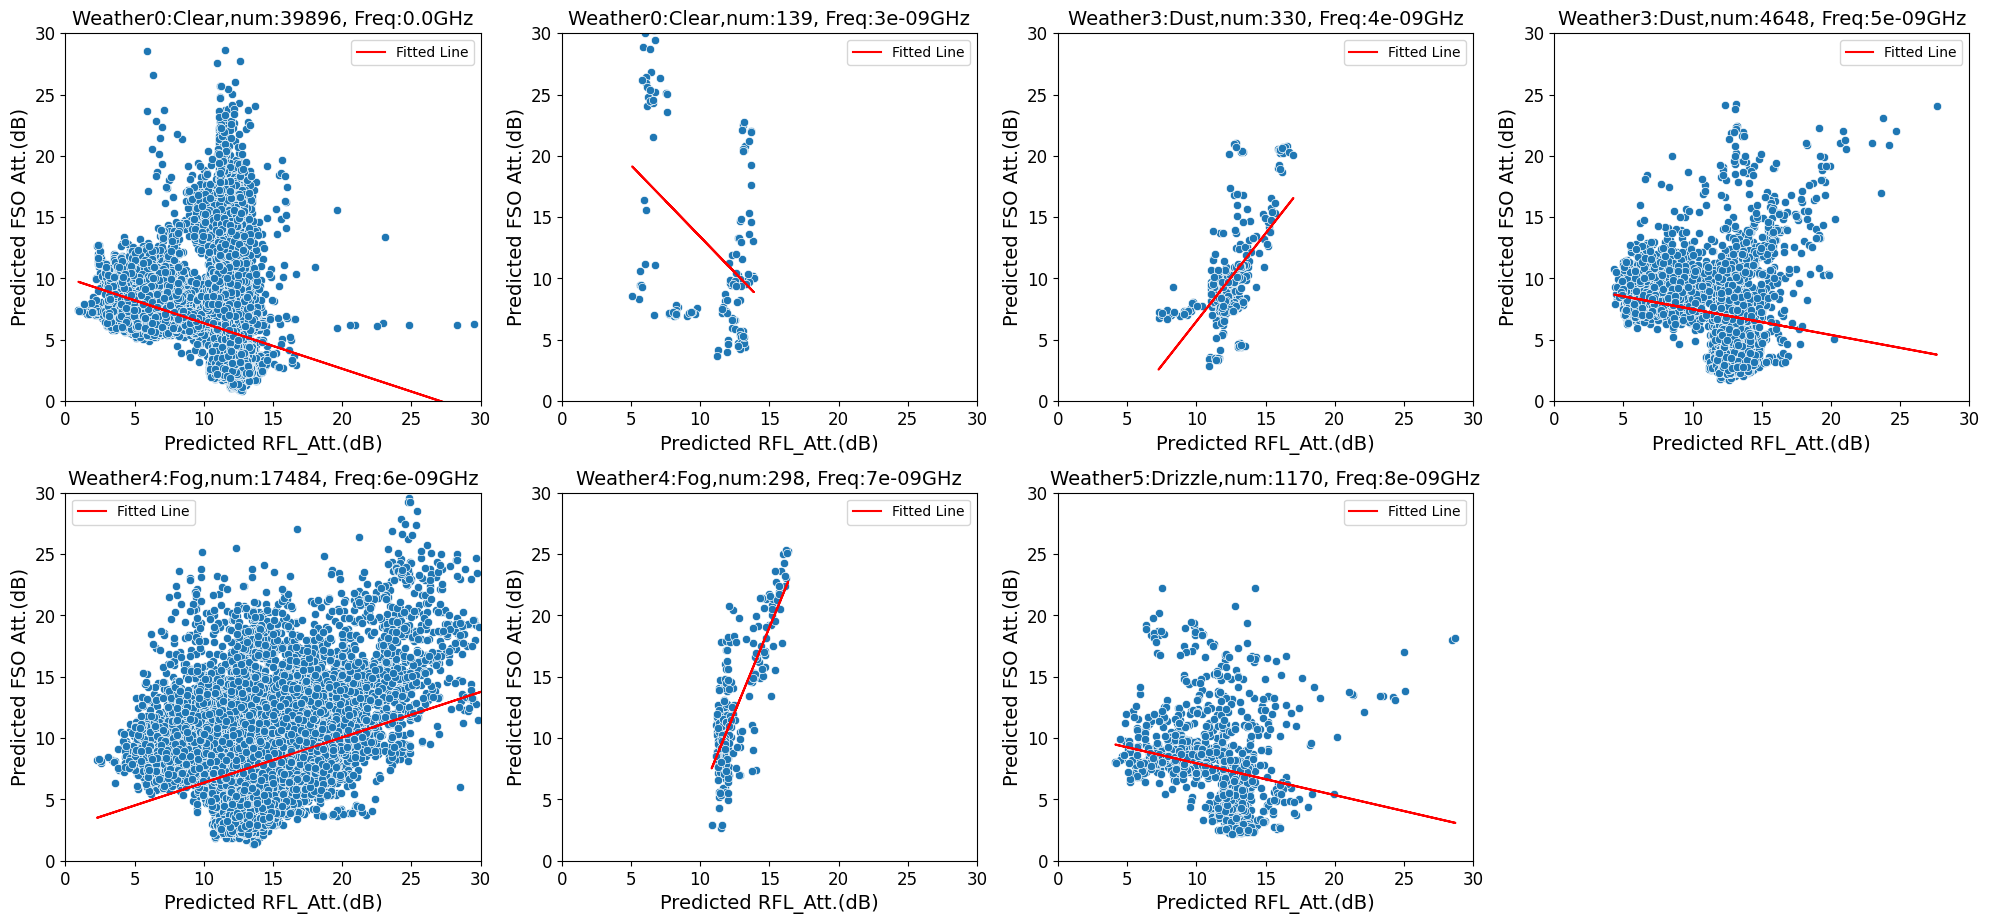

In [50]:
import math

synop_codes = [0,3,4,5,6,7,8]
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
# Create a figure
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed

# Counter for loop
count = 1
data = train_rfl_fso_summary
grouped = data.groupby(['SYNOPcode','Frequency'])
for name, group in grouped:

    
    rfl_1st = group["rfl_1st"]
    fso_2nd = group["fso_2nd"]
    num1 = rfl_1st.shape[0]

    count1 = math.floor((count - 1)/2)
    print(count1)
  
    plt.subplot(4, 4, count)
    sns.scatterplot(x=rfl_1st, y=fso_2nd)
    #plt.plot([fso_true.min(), fso_true.max()], [fso_true.min(), fso_true.max()], 'k--', lw=2, label='Baseline') # Plot y=x line
    slope, intercept = np.polyfit(rfl_1st, fso_2nd, 1) # Linear regression line
    plt.plot(rfl_1st, slope*rfl_1st + intercept, color='r', label='Fitted Line') # Plot linear regression line
    plt.title(f'Weather{synop_codes[count1]},num:{num1}, Freq:{name[1]}GHz',fontsize=14)
    plt.xlabel('Predicted RFL_Att.(dB)',fontsize=14)
    plt.ylabel('Predicted FSO Att.(dB)',fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # Set tick sizes
    # Set limits for x and y axes
    plt.xlim(0, 30)
    plt.ylim(0, 30)
    plt.legend() # Show legend

    # Increment counter
    count += 1

plt.tight_layout()
plt.show()
# plt.subplot(4, 4, count)
# sns.scatterplot(x=data['rfl_ori'], y=data['fso_ori'])
# #plt.plot([rfl_true.min(), rfl_true.max()], [rfl_true.min(), rfl_true.max()], 'k--', lw=2,label='Baseline') # Plot y=x line
# slope, intercept = np.polyfit(data['rfl_ori'], data['fso_ori'], 1) # Linear regression line
# plt.plot(data['rfl_ori'], slope*data['rfl_ori'] + intercept, color='r', label='Fitted Line') # Plot linear regression line
# #plt.title(f'Weath:all,Test_num:{(test_rfl_fso_summary['rfl_ori']).shape[0]}',fontsize=14)
# plt.title(f"Weather:all, ", fontsize=14)

# plt.xlabel('RFL_Att.(dB)',fontsize=14)
# plt.ylabel('FSO_Att.(dB)',fontsize=14)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)
# plt.legend() # Show legend
# # Increment counter


# Entropy

In [51]:
train_rfl_fso_summary = pd.read_csv('train_rfl_fso_summary.csv')
test_rfl_fso_summary = pd.read_csv('test_rfl_fso_summary.csv')

In [52]:
import numpy as np
from sklearn.metrics import mutual_info_score

data = train_rfl_fso_summary
# 离散化数据函数
def discretize(data, bins):
    return np.digitize(data, bins=bins)

# 定义分箱，间隔为1
def bin_set(d1,d2,interval = 0.1):
    bin_min = 0
    bin_max = max(d2.max(), d2.max())
    bins = np.arange(bin_min, bin_max + interval, interval)
    return bins

interval = 0.1

rfl_ori = data['rfl_ori']
fso_ori = data['fso_ori']
rfl_1st = data['rfl_1st']
fso_2nd = data['fso_2nd']
rfl_2nd = data['rfl_2nd']
fso_1st = data['fso_1st']


rfl_ori_discretized = discretize(rfl_ori, bin_set(rfl_ori,fso_ori,interval))
fso_ori_discretized = discretize(fso_ori, bin_set(rfl_ori,fso_ori,interval))

rfl_1st_discretized = discretize(rfl_1st, bin_set(rfl_1st,fso_2nd,interval))
fso_2nd_discretized = discretize(fso_2nd, bin_set(rfl_1st,fso_2nd,interval))

rfl_2nd_discretized = discretize(rfl_2nd, bin_set(rfl_2nd,fso_1st,interval))
fso_1st_discretized = discretize(fso_1st, bin_set(rfl_2nd,fso_1st,interval))
# 计算互信息
mutual_info1 = mutual_info_score(rfl_ori_discretized, fso_ori_discretized)
mutual_info2 = mutual_info_score(rfl_1st_discretized, fso_2nd_discretized)
mutual_info3 = mutual_info_score(rfl_2nd_discretized, fso_1st_discretized)
print(f'Mutual Information: {mutual_info1},{mutual_info2},{mutual_info3}')
values_all = [mutual_info1,mutual_info2,mutual_info3] 

values_all_train=[]
values_all_test=[]
if len(rfl_ori) == 63965:
    values_all_train  = values_all
else:
    values_all_test  = values_all

print('values_all_train=',values_all_train)
print('values_all_test=',values_all_test)

Mutual Information: 0.5644258333197697,0.5722381773787211,0.5717398366059716
values_all_train= [0.5644258333197697, 0.5722381773787211, 0.5717398366059716]
values_all_test= []


In [53]:
import numpy as np
from sklearn.metrics import mutual_info_score
data = test_rfl_fso_summary
#data = train_rfl_fso_summary
# Discretize data function
def discretize(data, bins):
    return np.digitize(data, bins=bins)

# Define bins with a given interval
def bin_set(d1, d2, interval=0.1):
    bin_min = 0
    bin_max = max(d1.max(), d2.max())
    bins = np.arange(bin_min, bin_max + interval, interval)
    return bins

def calculate_entropy(discretized_data):
    # Calculate the histogram
    bin_num = discretized_data.max()
    hist, bin_edges = np.histogram(discretized_data, bins=bin_num+1, density=True)
    # Calculate the probability mass function
    pmf = hist / np.sum(hist)
    # Calculate the entropy
    entropy = -np.sum(pmf * np.log(pmf + 1e-9))  # Adding a small value to avoid log(0)
    return entropy

interval = 0.1

rfl_ori = data['rfl_ori']
fso_ori = data['fso_ori']
rfl_1st = data['rfl_1st']
fso_2nd = data['fso_2nd']
rfl_2nd = data['rfl_2nd']
fso_1st = data['fso_1st']

rfl_ori_discretized = discretize(rfl_ori, bin_set(rfl_ori, fso_ori, interval))
fso_ori_discretized = discretize(fso_ori, bin_set(rfl_ori, fso_ori, interval))

rfl_1st_discretized = discretize(rfl_1st, bin_set(rfl_1st, fso_2nd, interval))
fso_2nd_discretized = discretize(fso_2nd, bin_set(rfl_1st, fso_2nd, interval))

rfl_2nd_discretized = discretize(rfl_2nd, bin_set(rfl_2nd, fso_1st, interval))
fso_1st_discretized = discretize(fso_1st, bin_set(rfl_2nd, fso_1st, interval))

# Calculate marginal entropies
H_rfl_ori = calculate_entropy(rfl_ori_discretized)
H_fso_ori = calculate_entropy(fso_ori_discretized)

H_rfl_1st = calculate_entropy(rfl_1st_discretized)
H_fso_2nd = calculate_entropy(fso_2nd_discretized)

H_rfl_2nd = calculate_entropy(rfl_2nd_discretized)
H_fso_1st = calculate_entropy(fso_1st_discretized)

# Calculate mutual information
mutual_info1 = mutual_info_score(rfl_ori_discretized, fso_ori_discretized)
mutual_info2 = mutual_info_score(rfl_1st_discretized, fso_2nd_discretized)
mutual_info3 = mutual_info_score(rfl_2nd_discretized, fso_1st_discretized)
values_all = [mutual_info1,mutual_info2,mutual_info3] 
# Calculate joint entropies using the relation I(X; Y) = H(X) + H(Y) - H(X, Y)
H_rfl_ori_fso_ori = H_rfl_ori + H_fso_ori - mutual_info1
H_rfl_1st_fso_2nd = H_rfl_1st + H_fso_2nd - mutual_info2
H_rfl_2nd_fso_1st = H_rfl_2nd + H_fso_1st - mutual_info3
values_all_h = [H_rfl_ori_fso_ori,H_rfl_1st_fso_2nd,H_rfl_2nd_fso_1st]

# values_all_train=[]
# values_all_test=[]
if len(rfl_ori) == 63965:
    values_all_train  = values_all
    print('values_all_train=',values_all_train)
else:
    values_all_test  = values_all
    print('values_all_test=',values_all_test)



# values_all_train_h=[]
# values_all_test_h=[]
if len(rfl_ori) == 63965:
    values_all_train_h  = values_all_h
    print('values_all_train_h=',values_all_train_h)
else:
    values_all_test_h  = values_all_h
    print('values_all_test_h=',values_all_test_h)



values_all_test= [0.7537665621733105, 0.7748485925174724, 0.772427252410256]
values_all_test_h= [8.694466271951832, 8.620849356847007, 8.627213316661347]


In [54]:

data = train_rfl_fso_summary # train_rfl_fso_summary

#correlation_matrix = data.groupby(['SYNOPcode', 'Frequency'])
correlation_matrix = data.groupby(['SYNOPcode'])
print(correlation_matrix)

entropy_list = []
h_list =[]

for group_name, group_data in correlation_matrix:
    print(group_name)
    # print("Group Name:", group_name)
    # print(group_data.columns)
    rfl_ori_discretized = discretize(group_data["rfl_ori"], bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval))
    fso_ori_discretized = discretize(group_data["fso_ori"], bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval))

    rfl_1st_discretized = discretize(group_data["rfl_1st"], bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval))
    fso_2nd_discretized = discretize(group_data["fso_2nd"], bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval))

    rfl_2nd_discretized = discretize(group_data["rfl_2nd"], bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval))
    fso_1st_discretized = discretize(group_data["fso_1st"], bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval))

    H_rfl_ori = calculate_entropy(rfl_ori_discretized)
    H_fso_ori = calculate_entropy(fso_ori_discretized)

    H_rfl_1st = calculate_entropy(rfl_1st_discretized)
    H_fso_2nd = calculate_entropy(fso_2nd_discretized)

    H_rfl_2nd = calculate_entropy(rfl_2nd_discretized)
    H_fso_1st = calculate_entropy(fso_1st_discretized)


    coe = mutual_info_score(rfl_ori_discretized, fso_ori_discretized)
    coe1 = mutual_info_score(rfl_1st_discretized, fso_2nd_discretized)
    coe2 = mutual_info_score(rfl_2nd_discretized, fso_1st_discretized)

    H_rfl_ori_fso_ori = H_rfl_ori + H_fso_ori - coe
    H_rfl_1st_fso_2nd = H_rfl_1st + H_fso_2nd - coe1
    H_rfl_2nd_fso_1st = H_rfl_2nd + H_fso_1st - coe2

    entropy_list.append([coe,coe1,coe2])
    h_list.append([H_rfl_ori_fso_ori,H_rfl_1st_fso_2nd,H_rfl_2nd_fso_1st])

print("h_list",h_list)

keys = [
    '0:Clear',
    '3:Dust',
    '4:Fog',
    '5:Drizzle',
    '6:Rain',
    '7:Snow',
    '8:Shower'
]
values  = {key: value for key, value in zip(keys, entropy_list)}
if data.shape[0] == 63965:
    values_train = values
    values_train['all'] = values_all_train
    print('values_train = ', values_train) 
    
else:
    values_test = values  
    values_test['all'] = values_all_test
    print('values_test = ', values_test)


values1  = {key: value for key, value in zip(keys, h_list)}

if data.shape[0] == 63965:
    values_train_h = values1
    values_train_h['all'] = values_all_train_h 
    print('values_train_h = ', values_train_h)
    
else:
    values_test_h = values1 
    values_test_h['all'] = values_all_test_h
    print('values_test_h = ', values_test_h)

(0,)
(3,)
(4,)
(5,)
(6,)
(7,)
(8,)
h_list [[8.272486192382958, 8.214231126961488, 8.218121350400295], [4.894580431220772, 4.8746337427658135, 4.924500450403216], [5.633116178588983, 5.635731466156728, 5.610526114136365], [7.861163368198786, 7.84554272257263, 7.841027765560204], [8.84681709058072, 8.822858702241161, 8.822842033955457], [5.5482294804925445, 5.540065749483665, 5.5609542544691015], [6.866325357625398, 6.836315628255552, 6.831732955286061]]
values_train =  {'0:Clear': [0.5143500085399156, 0.5267413068543301, 0.5251769970310534], '3:Dust': [3.1617547117082765, 3.2502294518499335, 3.1656342170256666], '4:Fog': [2.5412836606043867, 2.580647484206035, 2.6078099283749845], '5:Drizzle': [1.3476198188734179, 1.3274218142522587, 1.3389429921392273], '6:Rain': [1.0851731287629944, 1.0862770771459662, 1.0867568441651558], '7:Snow': [2.3952242877946532, 2.461975009833179, 2.4440431693556386], '8:Shower': [2.425055627451603, 2.4348687228979307, 2.4339536744509958], 'all': [0.5644258333

NameError: name 'values_all_train_h' is not defined

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the train set
synop_codes1 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower','all']
values1 = values_train
values1_h = values_train_h
# Data for the test set
synop_codes2 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower','all']
values2 = values_test
values2_h = values_test_h

# Extracting the groups of values for first set
values1_0 = [values1[synop][0] for synop in synop_codes1]
values1_1 = [values1[synop][1] for synop in synop_codes1]
values1_2 = [values1[synop][2] for synop in synop_codes1]

# Extracting the groups of values for second set
values2_0 = [values2[synop][0] for synop in synop_codes2]
values2_1 = [values2[synop][1] for synop in synop_codes2]
values2_2 = [values2[synop][2] for synop in synop_codes2]

# Preparing data for plotting
x = np.arange(len(synop_codes1))
bar_width = 0.25

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plotting first set
ax1.bar(x - bar_width, values1_0, bar_width, label='True Values')
ax1.bar(x, values1_1, bar_width, label='Method 1')
ax1.bar(x + bar_width, values1_2, bar_width, label='Method 2')

# Adding labels and title to the first subplot
ax1.set_xlabel('SYNOPcode',fontsize=18)
ax1.set_ylabel('Mutual Information',fontsize=18)
ax1.set_title('Train Set: Mutual Information of FSO and RFL by SYNOPcode',fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(synop_codes1)
ax1.tick_params(labelsize=14)

# # Adding correlation ranges annotations
# ax1.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
# ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
# ax1.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
# ax1.axhspan(-0.5, -0.85, color='green', alpha=0.2)
# ax1.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax1.legend(fontsize  = 14)
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
# Plotting second set
ax2.bar(x - bar_width, values2_0, bar_width, label='True Values')
ax2.bar(x, values2_1, bar_width, label='Method 1')
ax2.bar(x + bar_width, values2_2, bar_width, label='Method 2')

# Adding labels and title to the second subplot
ax2.set_xlabel('SYNOPcode',fontsize=18)
ax2.set_ylabel('Mutual Information',fontsize=18)
ax2.set_title('Test Set: Mutual Information of FSO and RFL by SYNOPcode',fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(synop_codes2)
ax2.tick_params(labelsize=14)
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# # Adding correlation ranges annotations
# ax2.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
# ax2.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
# ax2.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
# ax2.axhspan(-0.5, -0.85, color='green', alpha=0.2)
# ax2.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax2.legend(fontsize  = 14)
# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'values_test' is not defined

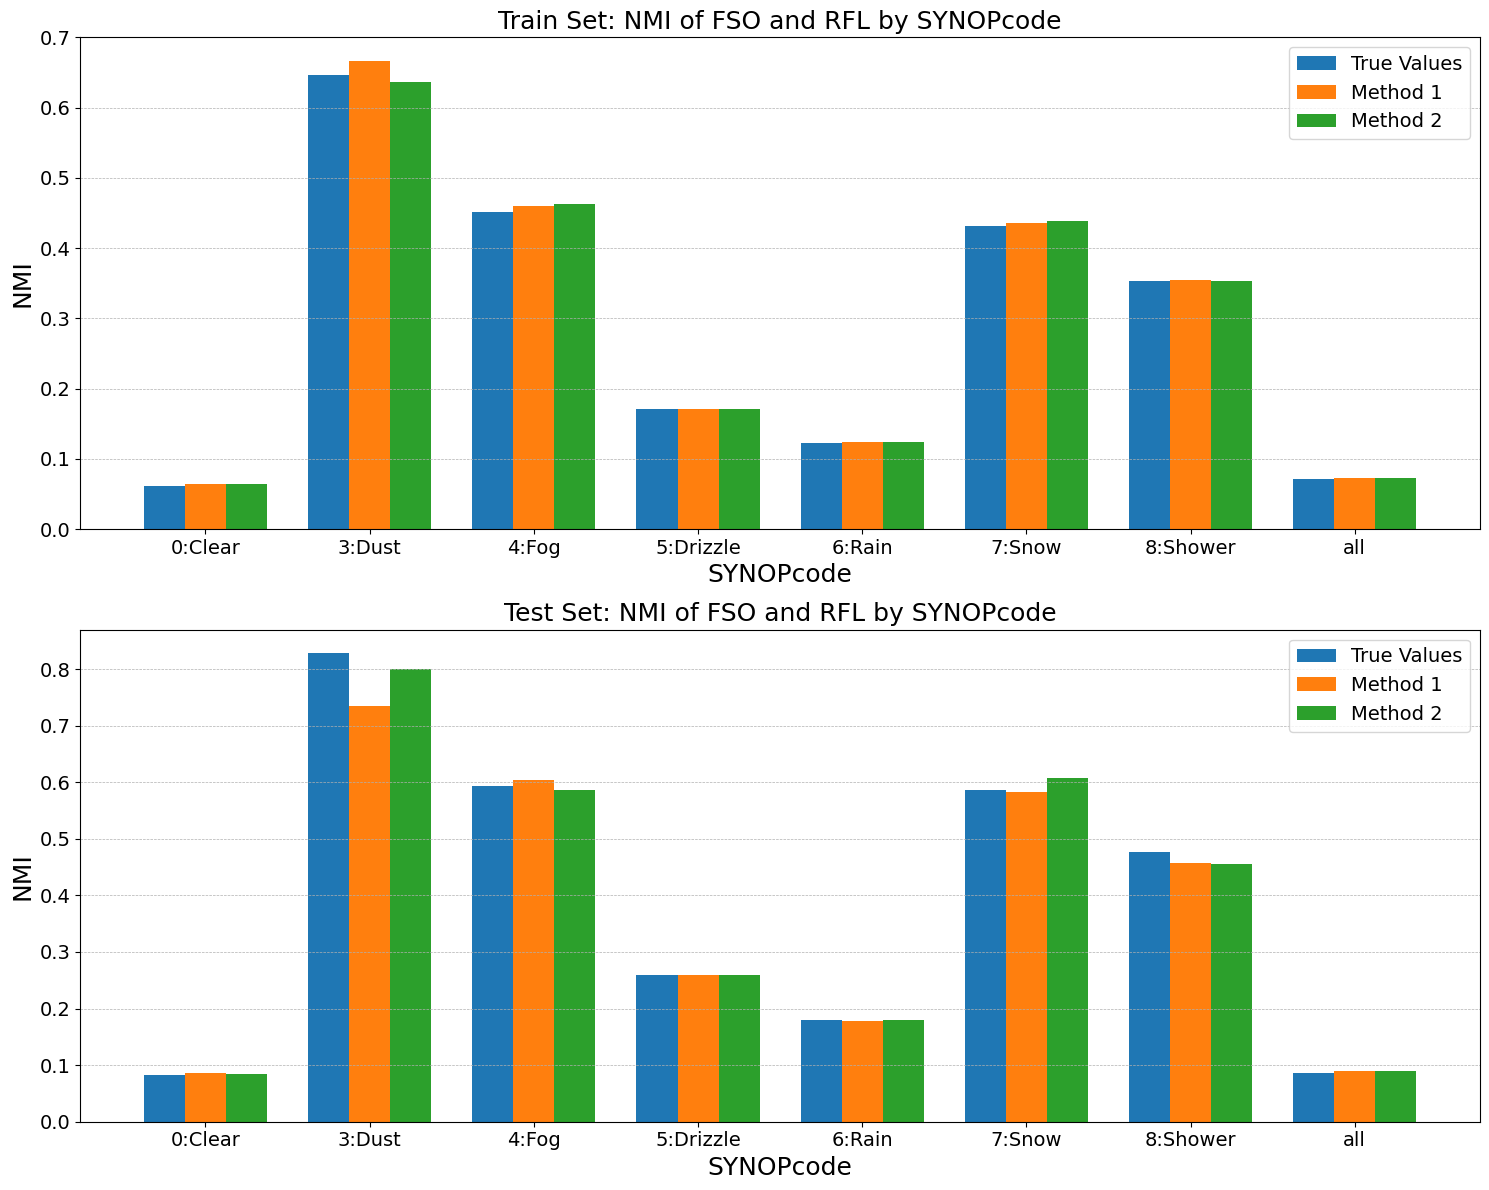

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the train set
synop_codes1 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower','all']
values1 = values_train
values1_h = values_train_h
# Data for the test set
synop_codes2 = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower','all']
values2 = values_test
values2_h = values_test_h

# Extracting the groups of values for first set
values1_0 = [values1[synop][0]/values1_h[synop][0] for synop in synop_codes1]
values1_1 = [values1[synop][1]/values1_h[synop][1] for synop in synop_codes1]
values1_2 = [values1[synop][2]/values1_h[synop][2] for synop in synop_codes1]

# Extracting the groups of values for second set
values2_0 = [values2[synop][0]/values2_h[synop][0] for synop in synop_codes2]
values2_1 = [values2[synop][1]/values2_h[synop][1] for synop in synop_codes2]
values2_2 = [values2[synop][2]/values2_h[synop][2] for synop in synop_codes2]

# Preparing data for plotting
x = np.arange(len(synop_codes1))
bar_width = 0.25

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Plotting first set
ax1.bar(x - bar_width, values1_0, bar_width, label='True Values')
ax1.bar(x, values1_1, bar_width, label='Method 1')
ax1.bar(x + bar_width, values1_2, bar_width, label='Method 2')

# Adding labels and title to the first subplot
ax1.set_xlabel('SYNOPcode',fontsize=18)
ax1.set_ylabel('NMI',fontsize=18)
ax1.set_title('Train Set: NMI of FSO and RFL by SYNOPcode',fontsize=18)
ax1.set_xticks(x)
ax1.set_xticklabels(synop_codes1)
ax1.tick_params(labelsize=14)

# # Adding correlation ranges annotations
# ax1.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
# ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
# ax1.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
# ax1.axhspan(-0.5, -0.85, color='green', alpha=0.2)
# ax1.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax1.legend(fontsize  = 14)
ax1.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
# Plotting second set
ax2.bar(x - bar_width, values2_0, bar_width, label='True Values')
ax2.bar(x, values2_1, bar_width, label='Method 1')
ax2.bar(x + bar_width, values2_2, bar_width, label='Method 2')

# Adding labels and title to the second subplot
ax2.set_xlabel('SYNOPcode',fontsize=18)
ax2.set_ylabel('NMI',fontsize=18)
ax2.set_title('Test Set: NMI of FSO and RFL by SYNOPcode',fontsize=18)
ax2.set_xticks(x)
ax2.set_xticklabels(synop_codes2)
ax2.tick_params(labelsize=14)
ax2.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

# # Adding correlation ranges annotations
# ax2.axhspan(-0.3, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
# ax2.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
# ax2.axhspan(0.5, 0.85, color='green', alpha=0.2, label='Strong Correlation')
# ax2.axhspan(-0.5, -0.85, color='green', alpha=0.2)
# ax2.axhspan(-0.3, -0.5, color='orange', alpha=0.2)
ax2.legend(fontsize  = 14)
# Show the plot
plt.tight_layout()
plt.show()

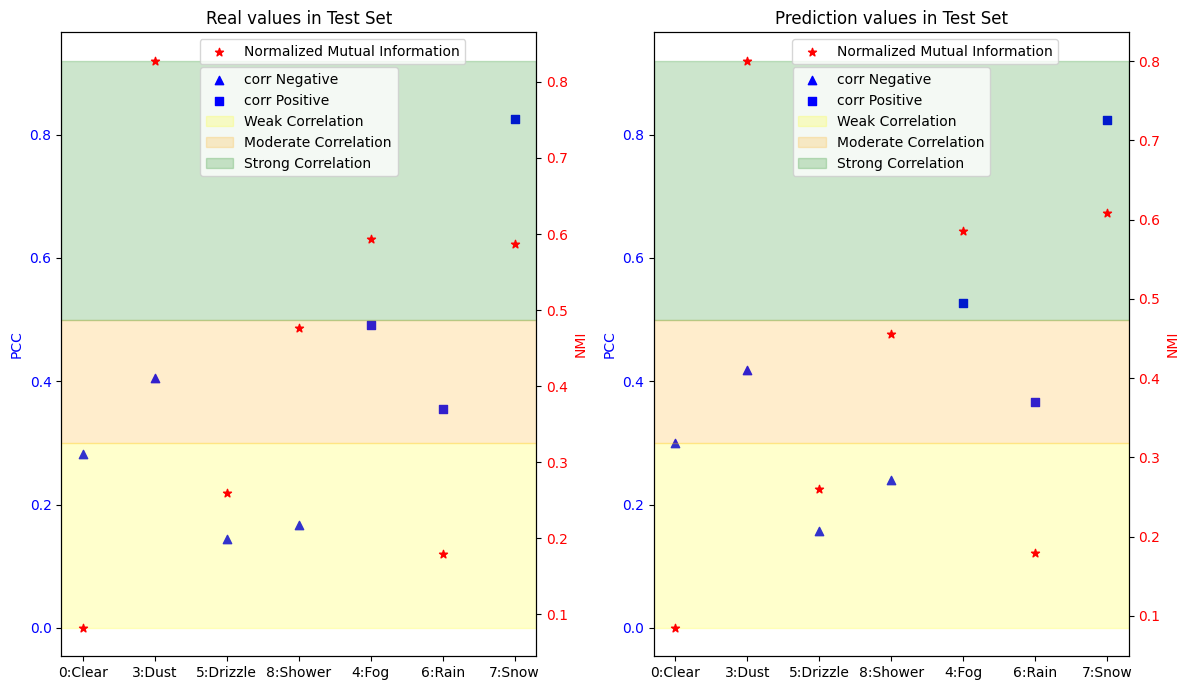

In [ ]:
import matplotlib.pyplot as plt

# 数据


values2_0_cor_p = [0, 0, 0.49200241747768464, 0, 0.35441024152583633, 0.8249750416249562, 0]
values2_0_cor_n = [-0.2822729709231866, -0.40588346734933767, 0, -0.14395378840529183, 0,0, -0.16620523047649544]

values2_2_cor_p = [0,0, 0.5264251931934119, 0, 0.3664325629560323, 0.8241631475373978, 0]
values2_2_cor_n = [-0.2992992689540678, -0.4182634099637823, 0, -0.15726087789277152, 0,0, -0.24049813980073018]

values2_0 = [0.08215213778982566, 0.8278825591985883, 0.593747820658161, 0.2592400416721599, 0.17932134533010477, 0.5863484237941063, 0.47685460413239433]
values2_2 = [0.08464552377441116, 0.8007520447053911, 0.5855902408073715, 0.2597455875812495, 0.17935105005591245, 0.6082576111539809, 0.45588815851890807]
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']

# 创建图形和轴
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 7))

# 画左边子图 values2_0_cor_n, values2_0_cor_p, values2_0
for i, value in enumerate(values2_0_cor_n):
    if value < 0:
        ax1.scatter(synop_codes[i], abs(value), color='blue', marker='^', label='corr Negative' if i == 0 else "")
for i, value in enumerate(values2_0_cor_p):
    if value > 0:
        ax1.scatter(synop_codes[i], value, color='blue', marker='s', label='corr Positive' if i == 2 else "")

ax1.set_title('Real values in Test Set')
ax1.set_ylabel('PCC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')



# 创建第二个Y轴
ax2 = ax1.twinx()
ax2.set_ylabel('NMI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 画 values2_0
ax2.scatter(synop_codes, values2_0, color='red', marker='*', label='Normalized Mutual Information')
ax1.axhspan(0, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax1.axhspan(0.5, 0.92, color='green', alpha=0.2, label='Strong Correlation')

# 添加右边子图的图例
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.955))
ax2.legend(loc='upper center',bbox_to_anchor=(0.571, 1))
# 画右边子图 values2_2_cor_n, values2_2_cor_p, values2_2
for i, value in enumerate(values2_2_cor_n):
    if value < 0:
        ax3.scatter(synop_codes[i], abs(value), color='blue', marker='^', label='corr Negative' if i == 0 else "")
for i, value in enumerate(values2_2_cor_p):
    if value > 0:
        ax3.scatter(synop_codes[i], value, color='blue', marker='s', label='corr Positive' if i == 2 else "")

ax3.set_title('Prediction values in Test Set')
ax3.set_ylabel('PCC', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')


# 创建第四个Y轴
ax4 = ax3.twinx()
ax4.set_ylabel('NMI', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# 画 values2_2
ax4.scatter(synop_codes, values2_2, color='red', marker='*', label='Normalized Mutual Information')
ax3.axhspan(0, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax3.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax3.axhspan(0.5, 0.92, color='green', alpha=0.2, label='Strong Correlation')

# 添加右边子图的图例
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.955))
ax4.legend(loc='upper center',bbox_to_anchor=(0.571, 1))
# 调整布局以防止重叠
fig.tight_layout()

# 显示图形
plt.show()



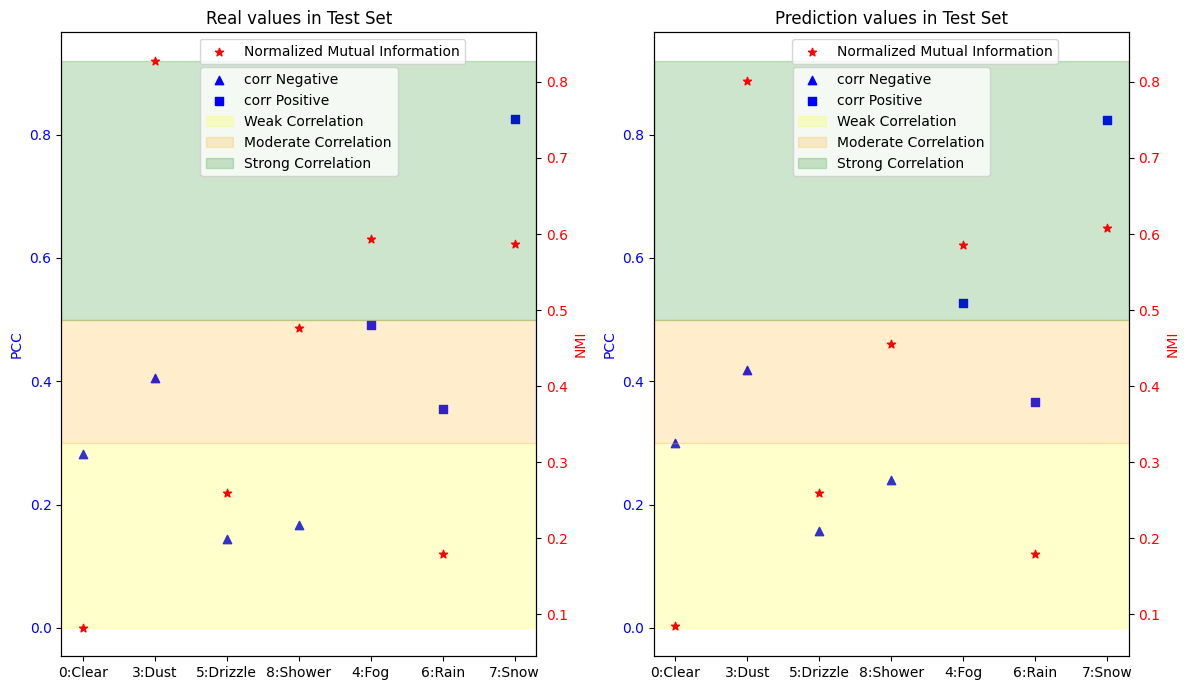

In [ ]:
import matplotlib.pyplot as plt

# 数据
values2_0_cor_p = [0, 0, 0.49200241747768464, 0, 0.35441024152583633, 0.8249750416249562, 0]
values2_0_cor_n = [-0.2822729709231866, -0.40588346734933767, 0, -0.14395378840529183, 0, 0, -0.16620523047649544]

values2_2_cor_p = [0, 0, 0.5264251931934119, 0, 0.3664325629560323, 0.8241631475373978, 0]
values2_2_cor_n = [-0.2992992689540678, -0.4182634099637823, 0, -0.15726087789277152, 0, 0, -0.24049813980073018]

values2_0 = [0.08215213778982566, 0.8278825591985883, 0.593747820658161, 0.2592400416721599, 0.17932134533010477, 0.5863484237941063, 0.47685460413239433]
values2_2 = [0.08464552377441116, 0.8007520447053911, 0.5855902408073715, 0.2597455875812495, 0.17935105005591245, 0.6082576111539809, 0.45588815851890807]
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']

# 创建图形和轴
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 7))

# 画左边子图 values2_0_cor_n, values2_0_cor_p, values2_0
for i, value in enumerate(values2_0_cor_n):
    if value < 0:
        ax1.scatter(synop_codes[i], abs(value), color='blue', marker='^', label='corr Negative' if i == 0 else "")
for i, value in enumerate(values2_0_cor_p):
    if value > 0:
        ax1.scatter(synop_codes[i], value, color='blue', marker='s', label='corr Positive' if i == 2 else "")

ax1.set_title('Real values in Test Set')
ax1.set_ylabel('PCC', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 创建第二个Y轴
ax2 = ax1.twinx()
ax2.set_ylabel('NMI', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 画 values2_0
ax2.scatter(synop_codes, values2_0, color='red', marker='*', label='Normalized Mutual Information')
ax1.axhspan(0, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax1.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax1.axhspan(0.5, 0.92, color='green', alpha=0.2, label='Strong Correlation')

# 添加右边子图的图例
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 0.955))
ax2.legend(loc='upper center', bbox_to_anchor=(0.571, 1))

# 画右边子图 values2_2_cor_n, values2_2_cor_p, values2_2
for i, value in enumerate(values2_2_cor_n):
    if value < 0:
        ax3.scatter(synop_codes[i], abs(value), color='blue', marker='^', label='corr Negative' if i == 0 else "")
for i, value in enumerate(values2_2_cor_p):
    if value > 0:
        ax3.scatter(synop_codes[i], value, color='blue', marker='s', label='corr Positive' if i == 2 else "")

ax3.set_title('Prediction values in Test Set')
ax3.set_ylabel('PCC', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# 创建第四个Y轴
ax4 = ax3.twinx()
ax4.set_ylabel('NMI', color='red')
ax4.tick_params(axis='y', labelcolor='red')

# 画 values2_2
ax4.scatter(synop_codes, values2_2, color='red', marker='*', label='Normalized Mutual Information')
ax3.axhspan(0, 0.3, color='yellow', alpha=0.2, label='Weak Correlation')
ax3.axhspan(0.3, 0.5, color='orange', alpha=0.2, label='Moderate Correlation')
ax3.axhspan(0.5, 0.92, color='green', alpha=0.2, label='Strong Correlation')

# 设置ax4与ax2共享相同的刻度
ax4.set_ylim(ax2.get_ylim())

# 添加右边子图的图例
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 0.955))
ax4.legend(loc='upper center', bbox_to_anchor=(0.571, 1))

# 调整布局以防止重叠
fig.tight_layout()

# 显示图形
plt.show()


1
3
5
7
9
11
13


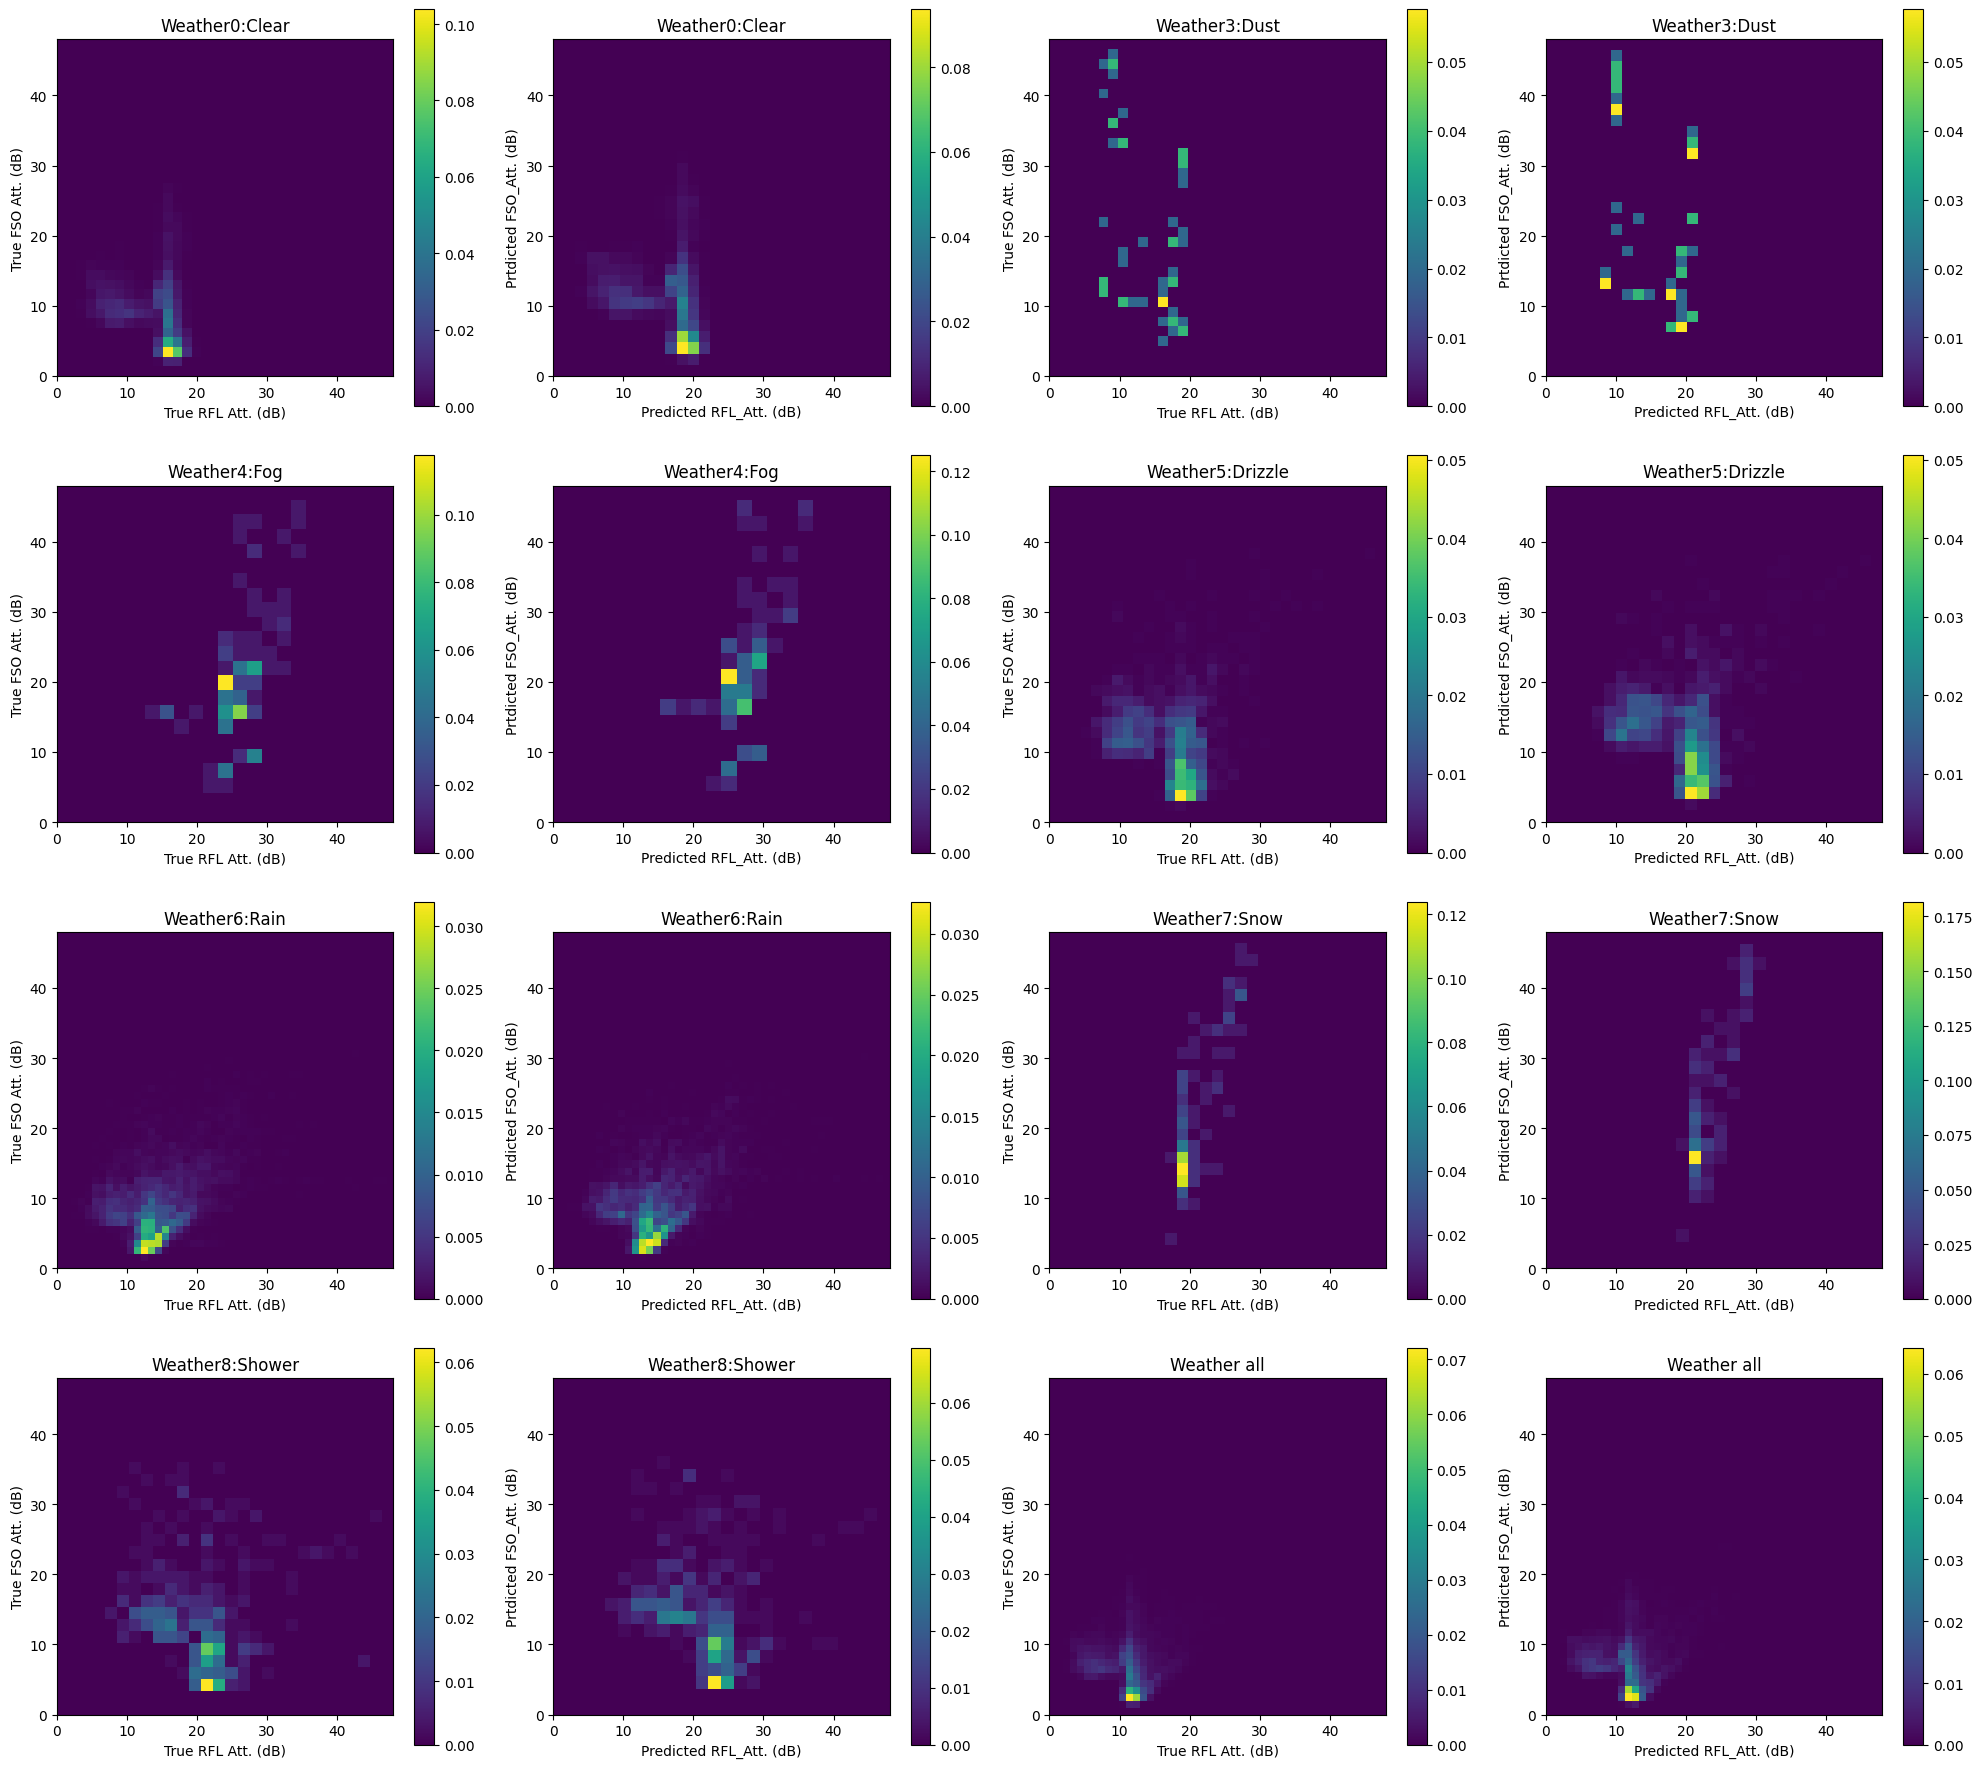

In [56]:

import math
data = test_rfl_fso_summary
correlation_matrix = data.groupby(['SYNOPcode'])

count =1
interval = 1
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
plt.figure(figsize=(20, 18))  # Adjust the figure size as needed
for group_name, group_data in correlation_matrix:
   
    # print("Group Name:", group_name)
    # print(group_data.columns)
    # 计算联合区间每个区间的样本数量
    rfl_ori_discretized = discretize(group_data["rfl_ori"], bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval))
    fso_ori_discretized = discretize(group_data["fso_ori"], bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval))

    rfl_1st_discretized = discretize(group_data["rfl_1st"], bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval))
    fso_2nd_discretized = discretize(group_data["fso_2nd"], bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval))

    rfl_2nd_discretized = discretize(group_data["rfl_2nd"], bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval))
    fso_1st_discretized = discretize(group_data["fso_1st"], bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval))
    
    joint_counts1 = np.zeros((len(bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval)), len(bin_set(group_data["rfl_ori"],group_data["fso_ori"],interval))))
    joint_counts2 = np.zeros((len(bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval)), len(bin_set(group_data["rfl_1st"],group_data["fso_2nd"],interval))))
    joint_counts3 = np.zeros((len(bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval)), len(bin_set(group_data["rfl_2nd"],group_data["fso_1st"],interval))))
    # for i in range(len(rfl_ori_discretized)):
    #     joint_counts1[rfl_ori_discretized[i] - 1, fso_ori_discretized[i] - 1] += 1
    # for i in range(len(rfl_1st_discretized)):
    #     joint_counts2[rfl_1st_discretized[i] - 1, fso_2nd_discretized[i] - 1] += 1
    for i in range(len(rfl_ori_discretized)):
        joint_counts1[fso_ori_discretized[i] - 1, rfl_ori_discretized[i] - 1] += 1
    for i in range(len(rfl_1st_discretized)):
        joint_counts2[fso_2nd_discretized[i] - 1, rfl_1st_discretized[i] - 1] += 1

    total_samples1 = np.sum(joint_counts1)
    total_samples2 = np.sum(joint_counts2)
    joint_counts_normalized1 = joint_counts1 / total_samples1
    joint_counts_normalized2 = joint_counts2 / total_samples2
    
    count1 =math.floor((count - 1)/2)
    print(count)
    
    plt.subplot(4, 4, count)
    plt.imshow(np.flipud(joint_counts_normalized1), extent=[0, len(bin_set(rfl_ori,fso_ori,1)), 0, len(bin_set(rfl_ori,fso_ori,1))])
    #plt.colorbar(label='Joint Probability')
    plt.colorbar()
    plt.ylabel('True FSO Att. (dB)')
    plt.xlabel('True RFL Att. (dB)')
    plt.title(f'Weather{synop_codes[count1]}')

    count += 1
    # Create subplots in the loop
    plt.subplot(4, 4, count)
    plt.imshow(np.flipud(joint_counts_normalized2), extent=[0, len(bin_set(rfl_ori,fso_ori,1)), 0, len(bin_set(rfl_ori,fso_ori,1))])
    #plt.colorbar(label='Joint Probability')
    plt.colorbar()
    plt.ylabel('Prtdicted FSO_Att. (dB)')
    plt.xlabel('Predicted RFL_Att. (dB)')
    plt.title(f'Weather{synop_codes[count1]}')

    count += 1

rfl_ori_discretized = discretize(data["rfl_ori"], bin_set(data["rfl_ori"],data["fso_ori"],interval))
fso_ori_discretized = discretize(data["fso_ori"], bin_set(data["rfl_ori"],data["fso_ori"],interval))

rfl_1st_discretized = discretize(data["rfl_1st"], bin_set(data["rfl_1st"],data["fso_2nd"],interval))
fso_2nd_discretized = discretize(data["fso_2nd"], bin_set(data["rfl_1st"],data["fso_2nd"],interval))

rfl_2nd_discretized = discretize(data["rfl_2nd"], bin_set(data["rfl_2nd"],data["fso_1st"],interval))
fso_1st_discretized = discretize(data["fso_1st"], bin_set(data["rfl_2nd"],data["fso_1st"],interval))

joint_counts1 = np.zeros((len(bin_set(data["rfl_ori"],data["fso_ori"],interval)), len(bin_set(data["rfl_ori"],data["fso_ori"],interval))))
joint_counts2 = np.zeros((len(bin_set(data["rfl_1st"],data["fso_2nd"],interval)), len(bin_set(data["rfl_1st"],data["fso_2nd"],interval))))
joint_counts3 = np.zeros((len(bin_set(data["rfl_2nd"],data["fso_1st"],interval)), len(bin_set(data["rfl_2nd"],data["fso_1st"],interval))))
# for i in range(len(rfl_ori_discretized)):
#     joint_counts1[rfl_ori_discretized[i] - 1, fso_ori_discretized[i] - 1] += 1
# for i in range(len(rfl_1st_discretized)):
#     joint_counts2[rfl_1st_discretized[i] - 1, fso_2nd_discretized[i] - 1] += 1
for i in range(len(rfl_ori_discretized)):
    joint_counts1[fso_ori_discretized[i] - 1, rfl_ori_discretized[i] - 1] += 1
for i in range(len(rfl_1st_discretized)):
    joint_counts2[fso_2nd_discretized[i] - 1, rfl_1st_discretized[i] - 1] += 1

total_samples1 = np.sum(joint_counts1)
total_samples2 = np.sum(joint_counts2)
joint_counts_normalized1 = joint_counts1 / total_samples1
joint_counts_normalized2 = joint_counts2 / total_samples2  

plt.subplot(4, 4, count)
plt.imshow(np.flipud(joint_counts_normalized1), extent=[0, len(bin_set(rfl_ori,fso_ori,1)), 0, len(bin_set(rfl_ori,fso_ori,1))])
#plt.colorbar(label='Joint Probability')
plt.colorbar()
plt.ylabel('True FSO Att. (dB)')
plt.xlabel('True RFL Att. (dB)')
plt.title(f'Weather all')

count += 1
# Create subplots in the loop
plt.subplot(4, 4, count)
plt.imshow(np.flipud(joint_counts_normalized2), extent=[0, len(bin_set(rfl_ori,fso_ori,1)), 0, len(bin_set(rfl_ori,fso_ori,1))])
#plt.colorbar(label='Joint Probability')
plt.colorbar()
plt.ylabel('Prtdicted FSO_Att. (dB)')
plt.xlabel('Predicted RFL_Att. (dB)')
plt.title(f'Weather all')

plt.tight_layout()
plt.show()



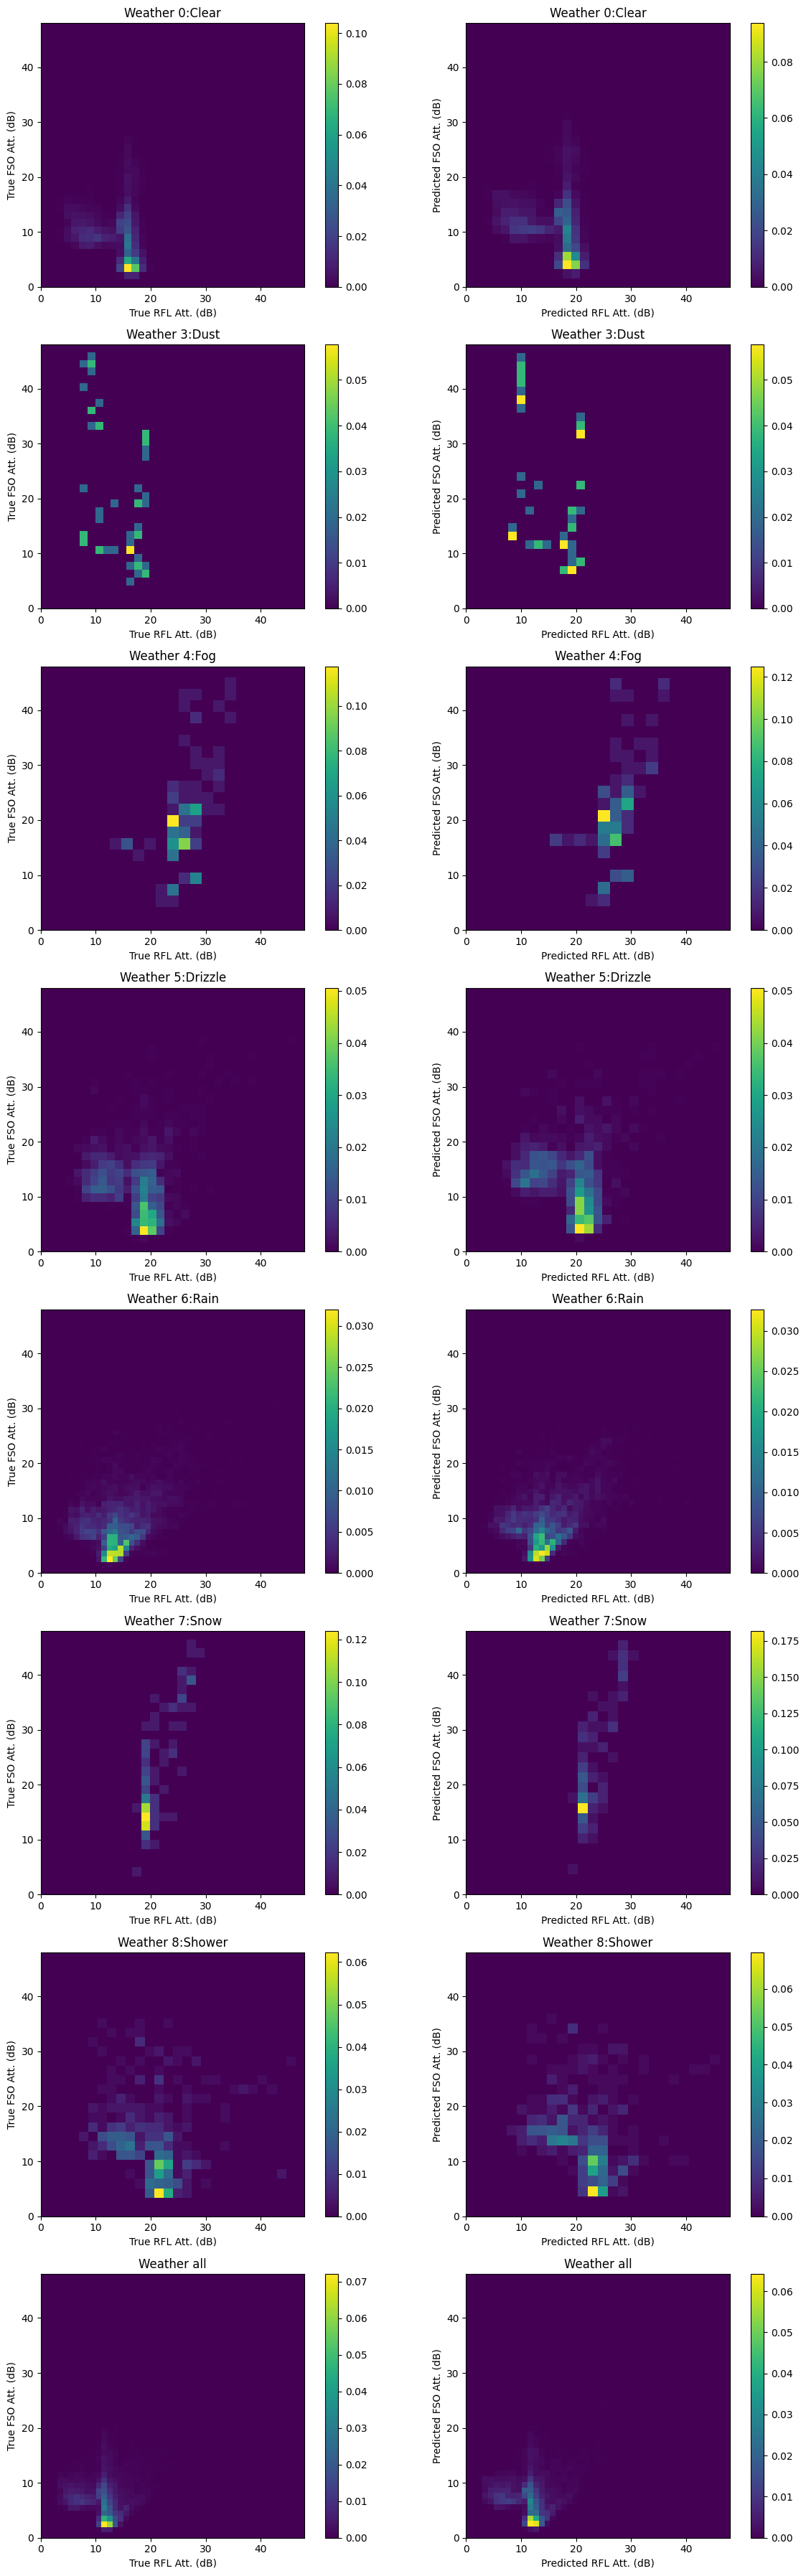

In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt

# 假设这些函数已经定义
# def discretize(...)
# def bin_set(...)

data = test_rfl_fso_summary
correlation_matrix = data.groupby(['SYNOPcode'])

count = 1
interval = 1
synop_codes = ['0:Clear', '3:Dust', '4:Fog', '5:Drizzle', '6:Rain', '7:Snow', '8:Shower']
plt.figure(figsize=(12, 36))  # 调整图像大小以适应两列布局
for group_name, group_data in correlation_matrix:
   
    rfl_ori_discretized = discretize(group_data["rfl_ori"], bin_set(group_data["rfl_ori"], group_data["fso_ori"], interval))
    fso_ori_discretized = discretize(group_data["fso_ori"], bin_set(group_data["rfl_ori"], group_data["fso_ori"], interval))

    rfl_1st_discretized = discretize(group_data["rfl_1st"], bin_set(group_data["rfl_1st"], group_data["fso_2nd"], interval))
    fso_2nd_discretized = discretize(group_data["fso_2nd"], bin_set(group_data["rfl_1st"], group_data["fso_2nd"], interval))

    rfl_2nd_discretized = discretize(group_data["rfl_2nd"], bin_set(group_data["rfl_2nd"], group_data["fso_1st"], interval))
    fso_1st_discretized = discretize(group_data["fso_1st"], bin_set(group_data["rfl_2nd"], group_data["fso_1st"], interval))
    
    joint_counts1 = np.zeros((len(bin_set(group_data["rfl_ori"], group_data["fso_ori"], interval)), len(bin_set(group_data["rfl_ori"], group_data["fso_ori"], interval))))
    joint_counts2 = np.zeros((len(bin_set(group_data["rfl_1st"], group_data["fso_2nd"], interval)), len(bin_set(group_data["rfl_1st"], group_data["fso_2nd"], interval))))
    joint_counts3 = np.zeros((len(bin_set(group_data["rfl_2nd"], group_data["fso_1st"], interval)), len(bin_set(group_data["rfl_2nd"], group_data["fso_1st"], interval))))
    
    for i in range(len(rfl_ori_discretized)):
        joint_counts1[fso_ori_discretized[i] - 1, rfl_ori_discretized[i] - 1] += 1
    for i in range(len(rfl_1st_discretized)):
        joint_counts2[fso_2nd_discretized[i] - 1, rfl_1st_discretized[i] - 1] += 1

    total_samples1 = np.sum(joint_counts1)
    total_samples2 = np.sum(joint_counts2)
    joint_counts_normalized1 = joint_counts1 / total_samples1
    joint_counts_normalized2 = joint_counts2 / total_samples2
    
    count1 = math.floor((count - 1) / 2)
    
    plt.subplot(8, 2, count)
    plt.imshow(np.flipud(joint_counts_normalized1), extent=[0, len(bin_set(rfl_ori, fso_ori, 1)), 0, len(bin_set(rfl_ori, fso_ori, 1))])
    plt.colorbar()
    plt.ylabel('True FSO Att. (dB)')
    plt.xlabel('True RFL Att. (dB)')
    plt.title(f'Weather {synop_codes[count1]}')

    count += 1
    
    plt.subplot(8, 2, count)
    plt.imshow(np.flipud(joint_counts_normalized2), extent=[0, len(bin_set(rfl_ori, fso_ori, 1)), 0, len(bin_set(rfl_ori, fso_ori, 1))])
    plt.colorbar()
    plt.ylabel('Predicted FSO Att. (dB)')
    plt.xlabel('Predicted RFL Att. (dB)')
    plt.title(f'Weather {synop_codes[count1]}')

    count += 1

rfl_ori_discretized = discretize(data["rfl_ori"], bin_set(data["rfl_ori"], data["fso_ori"], interval))
fso_ori_discretized = discretize(data["fso_ori"], bin_set(data["rfl_ori"], data["fso_ori"], interval))

rfl_1st_discretized = discretize(data["rfl_1st"], bin_set(data["rfl_1st"], data["fso_2nd"], interval))
fso_2nd_discretized = discretize(data["fso_2nd"], bin_set(data["rfl_1st"], data["fso_2nd"], interval))

rfl_2nd_discretized = discretize(data["rfl_2nd"], bin_set(data["rfl_2nd"], data["fso_1st"], interval))
fso_1st_discretized = discretize(data["fso_1st"], bin_set(data["rfl_2nd"], data["fso_1st"], interval))

joint_counts1 = np.zeros((len(bin_set(data["rfl_ori"], data["fso_ori"], interval)), len(bin_set(data["rfl_ori"], data["fso_ori"], interval))))
joint_counts2 = np.zeros((len(bin_set(data["rfl_1st"], data["fso_2nd"], interval)), len(bin_set(data["rfl_1st"], data["fso_2nd"], interval))))
joint_counts3 = np.zeros((len(bin_set(data["rfl_2nd"], data["fso_1st"], interval)), len(bin_set(data["rfl_2nd"], data["fso_1st"], interval))))

for i in range(len(rfl_ori_discretized)):
    joint_counts1[fso_ori_discretized[i] - 1, rfl_ori_discretized[i] - 1] += 1
for i in range(len(rfl_1st_discretized)):
    joint_counts2[fso_2nd_discretized[i] - 1, rfl_1st_discretized[i] - 1] += 1

total_samples1 = np.sum(joint_counts1)
total_samples2 = np.sum(joint_counts2)
joint_counts_normalized1 = joint_counts1 / total_samples1
joint_counts_normalized2 = joint_counts2 / total_samples2  

plt.subplot(8, 2, count)
plt.imshow(np.flipud(joint_counts_normalized1), extent=[0, len(bin_set(rfl_ori, fso_ori, 1)), 0, len(bin_set(rfl_ori, fso_ori, 1))])
plt.colorbar()
plt.ylabel('True FSO Att. (dB)')
plt.xlabel('True RFL Att. (dB)')
plt.title('Weather all')

count += 1

plt.subplot(8, 2, count)
plt.imshow(np.flipud(joint_counts_normalized2), extent=[0, len(bin_set(rfl_ori, fso_ori, 1)), 0, len(bin_set(rfl_ori, fso_ori, 1))])
plt.colorbar()
plt.ylabel('Predicted FSO Att. (dB)')
plt.xlabel('Predicted RFL Att. (dB)')
plt.title('Weather all')

plt.tight_layout()
plt.show()
